In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')


### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb' 
#PATH = 'test01A.pdb' 
#PATH = 'test01B.pdb' 
#PATH = 'test01C.pdb' 

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
ATOM       1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0
ATOM       2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0
ATOM       3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0
ATOM       4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0
ATOM       5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0
...      ...  ...  ...       ...    ...    ...    ...   ...          ...
ATOM      80  C17  OLA         4  13.33   3.74  85.90   1.0          0.0
ATOM      81  C18  OLA         4  14.17   4.44  84.83   1.0          0.0
ATOM      82  O19  OLA         4  14.77   3.94  83.89   1.0          0.0
ATOM      83  O20  OLA         4  14.23   5.79  84.99   1.0          0.0
ATOM      84  H21  OLA         4  13.65   6.10  85.75   1.0          0.0

[84 rows x 9 columns]

### Get the angle of each 3 Atoms

In [4]:
def angle_sign2(p1, p2, p3):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    res = np.dot(d1, d2)
    return 1 if  res> 0 else -1

def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    #sign = angle_sign2(a, b, c)
    return(np.degrees(angle))

def dots_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0   
1        2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0   
2        3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0   
3        4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0   
4        5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4  13.33   3.74  85.90   1.0          0.0   
80      81  C18  OLA         4  14.17   4.44  84.83   1.0          0.0   
81      82  O19  OLA         4  14.77   3.94  83.89   1.0          0.0   
82      83  O20  OLA         4  14.23   5.79  84.99   1.0          0.0   
83      84  H21  OLA         4  13.65   6.10  85.75   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
..         ...  
79  109.614374  
80  128.339073  
81   32.665938  
82  140.573392  
83    0.000000  

[84 rows x 10 columns]

### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
..         ...  
79  109.614374  
80  128.339073  
81   32.665938  
82  140.573392  
83    0.000000  

[84 rows x 10 columns]

### Get the distance of each 2 Atoms

In [7]:
def p1p2(p1, p2):
    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

def dots_distance(data0):
    data = data0.copy()
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        #squared_dist = np.sum((p1-p2)**2, axis=0)
        #dist = np.sqrt(squared_dist)
        #distances.append(dist)
        d1 = p1p2(p1, p2)
        distances.append(d1)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  
0     0.000000       1.531307  
1   107.748079       1.534731  
2   118.529798       1.534764  
3   104.618734       1.530131  
4   110.738952       1.528692  
..         ...            ...  
79  109.614374       1.529869  
80  128.339073       1.222129  
81   32.665938       2.219031  
82  140.573392       1.005037  
83    0.000000       0.000000  

[84 rows x 11 columns]

### Get the angle of each 4 Atoms

In [9]:
# calculate the singe (+/-) of two planes A and B
# A=(p1, p2, p3); B=(p2,p3,p4)
def angle_sign(p1, p2, p3, p4):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    p4 = list(p4)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    d3 = np.array(p3) - np.array(p4)
    # (d1 x d2) * d3
    res = np.dot(np.cross(d1, d2), d3)
    return 1 if  res> 0 else -1

In [10]:
p1 = np.array([0, 0, 0])
p2 = np.array([1,0,0])
p3 = np.array([2,1,0])
p4 = np.array([2.34, 0.52, 3.1])

In [11]:
angle_sign(p1, p2, p3, p4)
angle_sign2(p2, p3, p4)

-1

In [12]:
np.linalg.det(np.array([p2, p3, [0,0,1]]) )

1.0

In [13]:
np.abs(-1)

1

In [14]:
np.cross(p3-p1, p3-p2) + p3

array([2, 1, 1])

In [15]:
alpha = get_angle(p1, p2, p3)
alpha

135.0

In [16]:
np.cos((180-alpha) *np.pi/180)

0.7071067811865476

In [17]:
c_norm = np.linalg.norm(p3-p2)
b_norm = np.linalg.norm(p2-p1)

In [18]:
p4 = (p2-p1) + (p2-p1) * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) + p1

In [19]:
p5 = (p4-p3) + (p4-p3) + p4

In [20]:
np.cos((180-45) *np.pi/180)

-0.7071067811865475

In [21]:
def dots_extend_mirror(a, b, c):
    a = np.array(list(a))
    b = np.array(list(b))
    c = np.array(list(c))
    v_ab = b - a # vector from point b to a
    v_bc = c - b # vector from point c to b
    c_norm = np.linalg.norm(v_bc) # norm of vector bc
    b_norm = np.linalg.norm(v_ab) # # norm of vector ab
    alpha = get_angle(a, b, c) # dots angle between a, b, c
    v_ad = v_ab + v_ab * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) # vector ad extended from vector ab 
    d = v_ad + a # coordinates of middel point d, which is extended from vector ab
    v_cd = d - c # vector from point c to d
    v_ce = v_cd + v_cd # vector ce extended from vector cd
    e = v_ce + c # coordinates of mirrored point e, which is extended from vector cd
    return(e)

In [22]:
dots_extend_mirror(a=[0, 0, 0], b=[1, 0, 0], c=[2, 1, 0])

array([ 2., -1.,  0.])

In [23]:
#get_mirror_xyz(point1=[1,0,0], point2=[0,0,0], point3=[0,1,0], point4=[0.5,0.5,0])

In [24]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))


def dots_crossprod(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p3 - p2
    return(np.cross(v1, v2)+p3)

def dots_plane_d(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    # These two vectors are in the plane
    v1 = p3 - p1
    v2 = p2 - p1
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = np.dot(cp, p3)
    return (a,b,c,d)


# Function to mirror image
# https://www.geeksforgeeks.org/mirror-of-a-point-through-a-3-d-plane/
def mirror_point(a, b, c, d, x1, y1, z1):
    k = -2*(a*x1 + b*y1 + c*z1 + d)/float((a*a + b*b + c*c))
    x3 = a * k + x1
    y3 = b * k + y1
    z3 = c * k + z1
    return([x3, y3, z3])

# get mirrored point4, given a plane defined by point1, point2, point3 
def get_mirror_xyz(point1, point2, point3, point4):
    p1 = np.array(list(point1))
    p2 = np.array(list(point2))
    p3 = np.array(list(point3))
    p4 = np.array(list(point4))
    offset = p1
    p4 = p4 - offset
    a,b,c,d = dots_plane_d(p1-offset, p2-offset, p3-offset)
    pm = mirror_point(a, b, c, d, p4[0], p4[1], p4[2])
    ans = pm + offset
    return(ans)



def plane_sign(p1, p2, p3, p4):
    p1 = np.array(list(p1))
    p2 = np.array(list(p2))
    p3 = np.array(list(p3))
    p4 = np.array(list(p4))
    v1 = p2 - p1
    v2 = p3 - p2
    v3 = p4 - p3
    return np.dot(v3, np.cross(v1,v2))
    
# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return(A)

def surface_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        #e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        #sign = 1 if plane_sign(a, b, c, d) >= 0 else -1
        angles.append(A)
    angles.append(0)
    #angles.append(0)
    return(angles)

In [25]:
p1=[1,0,0]
p2=[0,3,0]
p3=[1,3,0]
a, b, c, d = dots_plane_d(p1, p2, p3)
print(a, b, c, d)
x1 = 1
y1 = 10
z1 = 4
 
# function call
mirror_point(a, b, c, d, x1, y1, z1) 

0 0 3 0


[1.0, 10.0, -4.0]

In [26]:
data['planes-angle'] = surface_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

In [27]:
get_mirror_xyz([2.34,0.52,-3.1],[3.684,-0.208,-3.183],[4.334,0.010,-4.547],[3.839,0.139,-5.323])

array([ 4.20553327,  0.78400961, -5.04524434])

In [28]:
data_sim = data.copy()
data_sim

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

### Solve 3 equations, to get x,y,z of D, given A, B, C
* C, D := dot_distance
* B, C, D := dot_angle
* A, B, C, D := planes-angle

In [29]:
from scipy.optimize import fsolve
import random

def solve_d(data, k):
    a = data.loc[k, ['X', 'Y', 'Z']]
    b = data.loc[k+1, ['X', 'Y', 'Z']]
    c = data.loc[k+2, ['X', 'Y', 'Z']]
    #d = data.loc[k+3, ['X', 'Y', 'Z']]
    feature = data.loc[k+2,["dots-angle", "dots-distance", "planes-angle"]]

    def fn0(w):
        sign = 1
        #sign = angle_sign2(b, c, w)
        return sign*get_angle(b, c, w)

    def fn1(w):
        return p1p2(c, w)

    def fn2(w):
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,w)
        sign = 1
        #sign = 1 if plane_sign(a, b, c, w) >= 0 else -1
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        return sign*A
    
    def myFunction(w):
       F = np.empty((3))
       F[0] = fn0(w) - feature[0]
       F[1] = fn1(w) - feature[1]
       F[2] = fn2(w) - feature[2]
       return F
    
    wGuess = np.array([0.1, 0.1, 0.1])
    w = fsolve(myFunction,wGuess)
    
    ## w2 is mirror of w from the plane of points a, b, c
    w2 = get_mirror_xyz(a,b,c,w)
    
    ## w3 is mirror of w from extended vector b c
    w3 = dots_extend_mirror(b, c, w)
    
    ## w4 is mirror of w2 from extended vector b c
    w4 = dots_extend_mirror(b, c, w2)
    
    ans = [w, w2, w3, w4]
    #return ans[np.random.choice(3)]
    return ans

In [30]:
data_sim = data.copy()
display(data_sim)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

In [31]:
k=0
solve_d(data_sim, k)

[array([ 2.34260354,  0.52542591, -3.09711741]),
 array([ 2.34,  0.52, -3.1 ]),
 array([ 2.50430144, -0.80394675, -0.75632574]),
 array([ 2.50690498, -0.79852085, -0.75344315])]

In [32]:
ans = solve_d(data_sim, k)
ans
p1p2(data_sim[['X','Y','Z']].iloc[k], data_sim[['X','Y','Z']].iloc[k+3])

3.9186732448623505

In [33]:
list(range(3,5))

[3, 4]

In [34]:
np.argmax(np.array([3,5,1]))

1

In [35]:
np.random.choice([[1],[1,2]])

[1]

In [36]:
def run_sim_df(data_sim, d=0, m=0):
    for k in range(m, len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = data_sim[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        d_max = np.argmax(l)
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_max, d_random], p=[0.95, 0.05])
        data_sim.at[k+3, 'X'] = xyz_sim[d][0]
        data_sim.at[k+3, 'Y'] = xyz_sim[d][1]
        data_sim.at[k+3, 'Z'] = xyz_sim[d][2]

    #list(data_sim.columns)

    sim = data_sim.copy()
    obs = data.copy()

    #sim.index = ['ATOM' for k in range(len(sim))]
    #obs.index = ['ATOM' for k in range(len(obs))]
    sim.index = [k for k in range(len(sim))]
    obs.index = [k for k in range(len(obs))]

    sim['X'] = sim['X'].astype(np.double)
    sim['Y'] = sim['Y'].astype(np.double)
    sim['Z'] = sim['Z'].astype(np.double)

    obs['X'] = obs['X'].astype(np.double)
    obs['Y'] = obs['Y'].astype(np.double)
    obs['Z'] = obs['Z'].astype(np.double)

    sim = sim.round(3)
    obs = obs.round(3)
    #print(sim)
    #print(obs)

    #sim[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim.pdb', sep =',')
    #obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].round(3).to_csv('data_obs.pdb', sep =',')

    tmpdf = pd.concat([obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']], 
               sim[['dots-angle', 'dots-distance','planes-angle', 'X','Y','Z']]], axis=1)
    tmpdf.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle',
                    'Xsim','Ysim','Zsim']
    return(tmpdf)

In [37]:
data_sim1 = data.copy()
data_sim2 = data.copy()
data_sim3 = data.copy()
data_sim4 = data.copy()

data_sim1 = run_sim_df(data_sim1, d=0, m=0)
data_sim2 = run_sim_df(data_sim2, d=1, m=0)
data_sim3 = run_sim_df(data_sim3, d=2, m=0)
data_sim4 = run_sim_df(data_sim4, d=3, m=0)

In [38]:
#data_sim1.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim2.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim3.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim4.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']

data_sim1.index = ['ATOM' for k in range(len(data_sim1))]
data_sim2.index = ['ATOM' for k in range(len(data_sim2))]
data_sim3.index = ['ATOM' for k in range(len(data_sim3))]
data_sim4.index = ['ATOM' for k in range(len(data_sim4))]

display(data_sim1)
display(data_sim2)
display(data_sim3)
display(data_sim4)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle     Xsim    Ysim    Zsim  
ATOM       0.000          1.531         0.000    0.000   0.000   0.000  
ATOM     107.748          1.535         0.000    0.340   0.570  -1.380  
ATOM     118.530          1.535       179.858    1.750   0.090  -1.750  
ATOM     104.619          1.530       176.529    2.343   0.525  -3.097  
ATOM     110.739          1.529       173.206    3.692  -0.192  -3.175  
...          ...            ...           ...      ...     ...     ...  
ATOM     109.614          1.530       171.491  128.104 -48.240  64.888  
ATOM     128.339          1.222        10.869  129.165 -47.636  63.966  
ATOM      32.666          2.219       179.781  129.017 -47.157  62.851  
ATOM     140.573          1.005         6.050  130.416 -47.654  64.500  
ATOM       0.000          0.000         0.000  131.377 -47.528  64.768  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000   0.000  
ATOM     107.748          1.535         0.000   0.340   0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192  -3.175  
...          ...            ...           ...     ...     ...     ...  
ATOM     109.614          1.530       171.491  39.100  73.721 -68.449  
ATOM     128.339          1.222        10.869  38.603  74.954 -67.693  
ATOM      32.666          2.219       179.781  38.790  75.253 -66.523  
ATOM     140.573          1.005         6.050  37.867  75.799 -68.465  
ATOM       0.000          0.000         0.000  37.256  76.488 -68.868  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim   Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000  0.000  
ATOM     107.748          1.535         0.000   0.340   0.570 -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090 -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525 -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192 -3.175  
...          ...            ...           ...     ...     ...    ...  
ATOM     109.614          1.530       171.491  84.158  36.215 -2.370  
ATOM     128.339          1.222        10.869  85.424  36.282 -3.226  
ATOM      32.666          2.219       179.781  85.526  36.579 -4.407  
ATOM     140.573          1.005         6.050  86.555  35.959 -2.541  
ATOM       0.000          0.000         0.000  87.463  35.686 -2.209  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim     Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000    0.000   0.000  
ATOM     107.748          1.535         0.000   0.340    0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750    0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343    0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692   -0.192  -3.175  
...          ...            ...           ...     ...      ...     ...  
ATOM     109.614          1.530       171.491  16.573  133.892 -25.294  
ATOM     128.339          1.222        10.869  15.404  132.950 -25.000  
ATOM      32.666          2.219       179.781  15.356  131.736 -25.136  
ATOM     140.573          1.005         6.050  14.302  133.590 -24.523  
ATOM       0.000          0.000         0.000  13.395  133.906 -24.230  

[84 rows x 15 columns]

In [39]:
data_sim1[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim1.csv', sep =',')
data_sim2[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim2.csv', sep =',')
data_sim3[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim3.csv', sep =',')
data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim4.csv', sep =',')

data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs1.csv', sep =',')

os.system('sh csv2pdb2.sh')

0

In [40]:
np.linalg.norm(data_sim4[['Xsim','Ysim','Zsim']].iloc[2] - data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

1.5346931289349022

In [41]:
get_angle(data_sim4[['Xsim','Ysim','Zsim']].iloc[1], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[2], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

118.55117025461429

In [42]:
get_angle(a, b, c)

nan

In [43]:
data

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

### Load all protein data

In [44]:
#PATH = 'CeramideMix-lipids-Test.pdb'
#PATH = 'test01.pdb'
#PATH = 'test06.pdb'
PATH = 'CeramideMix.pdb'

In [45]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all = data_all[data_all['1DPP'] == 'OLA']
# data_all = data_all[data_all['Cx'] != 'O20'] # drop O20
data_all = data_all[data_all['Cx'] != 'O19'] # drop O19
data_all.index = range(len(data_all))
display(data_all)

REMARK   Cx 1DPP  COMPLIES       X      Y      Z  2.0,  18-NOV-1998
0         1.0   C1  OLA       1.0   44.29  24.62  58.04   1.0          0.0
1         2.0   C2  OLA       1.0   44.63  25.19  56.66   1.0          0.0
2         3.0   C3  OLA       1.0   46.04  24.71  56.29   1.0          0.0
3         4.0   C4  OLA       1.0   46.63  25.14  54.94   1.0          0.0
4         5.0   C5  OLA       1.0   48.05  24.57  54.94   1.0          0.0
...       ...  ...  ...       ...     ...    ...    ...   ...          ...
1275  63535.0  C16  OLA    6240.0  106.55  53.02  78.65   1.0          0.0
1276  63536.0  C17  OLA    6240.0  106.95  52.32  79.95   1.0          0.0
1277  63537.0  C18  OLA    6240.0  106.48  52.96  81.26   1.0          0.0
1278  63539.0  O20  OLA    6240.0  106.44  52.12  82.33   1.0          0.0
1279  63540.0  H21  OLA    6240.0  106.28  52.74  83.10   1.0          0.0

[1280 rows x 9 columns]

In [46]:
df=data_all
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [47]:
COMPLIES = np.unique(data_all['COMPLIES'])[:-1]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]].copy() for k in range(len(COMPLIES))]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]] for k in range(len(COMPLIES))]
protein_list = []
for k in range(len(COMPLIES)):
    #tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]].copy()
    tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]]
    tmp_df.index = range(len(tmp_df))
    protein_list.append(tmp_df)

In [48]:
COMPLIES

array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 1.200e+01,
       1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 8.170e+02, 8.180e+02,
       8.190e+02, 8.200e+02, 8.210e+02, 8.220e+02, 8.230e+02, 8.240e+02,
       8.250e+02, 8.260e+02, 8.270e+02, 8.280e+02, 8.290e+02, 8.300e+02,
       8.310e+02, 8.320e+02, 5.409e+03, 5.410e+03, 5.411e+03, 5.412e+03,
       5.413e+03, 5.414e+03, 5.415e+03, 5.416e+03, 5.417e+03, 5.418e+03,
       5.419e+03, 5.420e+03, 5.421e+03, 5.422e+03, 5.423e+03, 5.424e+03,
       6.225e+03, 6.226e+03, 6.227e+03, 6.228e+03, 6.229e+03, 6.230e+03,
       6.231e+03, 6.232e+03, 6.233e+03, 6.234e+03, 6.235e+03, 6.236e+03,
       6.237e+03, 6.238e+03, 6.239e+03])

In [49]:
display(protein_list[0])

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
0      1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0
1      2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0
2      3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0
3      4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0
4      5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0
5      6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0
6      7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0
7      8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0
8      9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0
9     10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0
10    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0
11    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0
12    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0
13    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0
14    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0
15    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0
16    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0
17    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0
18    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0
19    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0

In [50]:
df = protein_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [51]:
def sim_XYZ(data):
    data_sim = data.copy()
    for k in range(len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        data_sim.at[k+3, 'X'] = xyz_sim[0]
        data_sim.at[k+3, 'Y'] = xyz_sim[1]
        data_sim.at[k+3, 'Z'] = xyz_sim[2]
    return(data_sim)

In [52]:
def portein_format(data):
    data.index = range(len(data))
    #data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    #data['dots-angle'] = dots_angle(data)
    #data['dots-distance'] = dots_distance(data)
    #data['planes-angle'] = surface_angle(data)
    ## simulate XYZ given dot-angle, dots-distance, planes-angle
    #data_sim = sim_XYZ(data)
    data_sim = run_sim_df(data)
    data['Xsim'] = data_sim['Xsim']
    data['Ysim'] = data_sim['Ysim']
    data['Zsim'] = data_sim['Zsim']
    return(data)

In [53]:
#portein_format_list = [portein_format(p) for p in protein_list]
portein_format_list = [p for p in protein_list]

In [54]:
#portein_format(protein_list[1])

In [55]:
portein_format_list[0]

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
0      1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0
1      2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0
2      3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0
3      4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0
4      5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0
5      6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0
6      7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0
7      8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0
8      9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0
9     10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0
10    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0
11    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0
12    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0
13    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0
14    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0
15    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0
16    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0
17    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0
18    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0
19    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0

In [56]:
df = portein_format_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [57]:
k=5
df.loc[k, ['X', 'Y', 'Z']] - data_all.loc[k, ['X', 'Y', 'Z']]

X    0.0
Y    0.0
Z    0.0
Name: 5, dtype: object

In [58]:
def remove_digits(s):
    return(''.join([i for i in s if not i.isdigit()]))

def atom_seq(data):
    atoms = [None,None]
    for k in range(2, len(data)-1):
        tmp = remove_digits(''.join(data['Cx'][(k-2):(k+2)]))
        atoms.append(tmp)
    atoms.append(None)
    #atoms.append(None)
    data['atom_seq'] = atoms
    return(data)

In [59]:
portein_format_list = [atom_seq(data) for data in portein_format_list]

In [60]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")

display(df)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0       1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1       2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2       3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3       4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4       5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
..      ...  ...  ...       ...    ...    ...    ...   ...          ...   
15  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
16  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
17  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
18  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   
19  63519.0  H21  OLA    6239.0  87.14  29.23  34.16   1.0          0.0   

   atom_seq  
0      None  
1      None  
2      CCCC  
3      CCCC  
4      CCCC  
..      ...  
15     CCCC  
16     CCCC  
17     CCCO  
18     CCOH  
19     None  

[1260 rows x 10 columns]

In [61]:
def planes_angle2(a1, b1, c1, a2, b2, c2):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return(A)

In [62]:
def dot_distance2(data):
    data.index = range(len(data))
    d1 = []
    d2 = []
    d3 = []
    d2.append(None)
    d2.append(None)
    d1.append(None)
    d1.append(None)
    d3.append(None)
    d3.append(None)
    for k in range(2, len(data)-1):
        p1 = data.loc[k-2, ['X', 'Y', 'Z']]
        p2 = data.loc[k-1, ['X', 'Y', 'Z']]
        p3 = data.loc[k, ['X', 'Y', 'Z']]
        p4 = data.loc[k+1, ['X', 'Y', 'Z']]
        d2_tmp = p1p2(p2, p4)
        d3_tmp = p1p2(p1, p4)
        d1_tmp = p1p2(p3, p4)
        d2.append(d2_tmp)
        d3.append(d3_tmp)
        d1.append(d1_tmp)
    
    d2.append(None)
    d3.append(None)
    d1.append(None)
    
    dots_angle = [None]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        dots_angle.append(get_angle(a, b, c))
    dots_angle.append(None)
    
    planes_angle = [None,None]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle2(x1, y1, z1, x2, y2, z2)
        planes_angle.append(A)
    planes_angle.append(None)
    
    data['dot_distance2'] = d2
    data['dot_distance3'] = d3
    data['dot_distance1'] = d1
    data['dots-distance'] = d1
    data['dots-angle'] = dots_angle
    data['planes-angle'] = planes_angle
    
    return(data)

In [63]:
df = pd.concat([dot_distance2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])
display(df)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0       1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1       2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2       3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3       4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4       5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
..      ...  ...  ...       ...    ...    ...    ...   ...          ...   
15  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
16  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
17  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
18  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   
19  63519.0  H21  OLA    6239.0  87.14  29.23  34.16   1.0          0.0   

   atom_seq  dot_distance2  dot_distance3  dot_distance1  dots-distance  \
0      None            NaN            NaN            NaN            NaN   
1      None            NaN            NaN            NaN            NaN   
2      CCCC       2.638352       3.918673       1.534764       1.534764   
3      CCCC       2.425325       3.878041       1.530131       1.530131   
4      CCCC       2.516903       3.809396       1.528692       1.528692   
..      ...            ...            ...            ...            ...   
15     CCCC       2.536316       3.930407       1.525287       1.525287   
16     CCCC       2.481250       3.676602       1.529542       1.529542   
17     CCCO       2.408983       3.111929       1.358050       1.358050   
18     CCOH       1.925357       2.343438       0.995841       0.995841   
19     None            NaN            NaN            NaN            NaN   

    dots-angle  planes-angle  
0          NaN           NaN  
1   107.748079           NaN  
2   118.529798    179.858227  
3   104.618734    176.528730  
4   110.738952    173.205899  
..         ...           ...  
15  112.042305    163.905401  
16  108.630341    130.801374  
17  112.942334     82.816131  
18  108.785102     15.721620  
19         NaN           NaN  

[1260 rows x 16 columns]

In [64]:
df = pd.concat([portein_format(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])
display(df)

REMARK   Cx 1DPP  COMPLIES          X          Y          Z  2.0,  \
0       1.0   C1  OLA       1.0  44.290000  24.620000  58.040000   1.0   
1       2.0   C2  OLA       1.0  44.630000  25.190000  56.660000   1.0   
2       3.0   C3  OLA       1.0  46.040000  24.710000  56.290000   1.0   
3       4.0   C4  OLA       1.0  46.632604  25.145426  54.942883   1.0   
4       5.0   C5  OLA       1.0  47.981942  24.428164  54.864647   1.0   
..      ...  ...  ...       ...        ...        ...        ...   ...   
15  63514.0  C16  OLA    6239.0  90.311678  27.940178  36.645440   1.0   
16  63515.0  C17  OLA    6239.0  91.645087  27.790648  35.920070   1.0   
17  63516.0  C18  OLA    6239.0  91.496236  26.717760  34.840137   1.0   
18  63518.0  O20  OLA    6239.0  91.247966  27.236052  33.609676   1.0   
19  63519.0  H21  OLA    6239.0  91.414718  26.531919  32.925505   1.0   

    18-NOV-1998 atom_seq  dot_distance2  dot_distance3  dot_distance1  \
0           0.0     None            NaN            NaN            NaN   
1           0.0     None            NaN            NaN            NaN   
2           0.0     CCCC       2.638352       3.918673       1.534764   
3           0.0     CCCC       2.425325       3.878041       1.530131   
4           0.0     CCCC       2.516903       3.809396       1.528692   
..          ...      ...            ...            ...            ...   
15          0.0     CCCC       2.536316       3.930407       1.525287   
16          0.0     CCCC       2.481250       3.676602       1.529542   
17          0.0     CCCO       2.408983       3.111929       1.358050   
18          0.0     CCOH       1.925357       2.343438       0.995841   
19          0.0     None            NaN            NaN            NaN   

    dots-distance  dots-angle  planes-angle    Xsim    Ysim    Zsim  
0             NaN         NaN           NaN  44.290  24.620  58.040  
1             NaN  107.748079           NaN  44.630  25.190  56.660  
2        1.534764  118.529798    179.858227  46.040  24.710  56.290  
3        1.530131  104.618734    176.528730  46.633  25.145  54.943  
4        1.528692  110.738952    173.205899  47.982  24.428  54.865  
..            ...         ...           ...     ...     ...     ...  
15       1.525287  112.042305    163.905401  90.312  27.940  36.645  
16       1.529542  108.630341    130.801374  91.645  27.791  35.920  
17       1.358050  112.942334     82.816131  91.496  26.718  34.840  
18       0.995841  108.785102     15.721620  91.248  27.236  33.610  
19            NaN         NaN           NaN  91.415  26.532  32.926  

[1260 rows x 19 columns]

### Drop proteins distance > 4

In [65]:
#df = pd.concat(portein_format_list)

In [66]:
df

REMARK   Cx 1DPP  COMPLIES          X          Y          Z  2.0,  \
0       1.0   C1  OLA       1.0  44.290000  24.620000  58.040000   1.0   
1       2.0   C2  OLA       1.0  44.630000  25.190000  56.660000   1.0   
2       3.0   C3  OLA       1.0  46.040000  24.710000  56.290000   1.0   
3       4.0   C4  OLA       1.0  46.632604  25.145426  54.942883   1.0   
4       5.0   C5  OLA       1.0  47.981942  24.428164  54.864647   1.0   
..      ...  ...  ...       ...        ...        ...        ...   ...   
15  63514.0  C16  OLA    6239.0  90.311678  27.940178  36.645440   1.0   
16  63515.0  C17  OLA    6239.0  91.645087  27.790648  35.920070   1.0   
17  63516.0  C18  OLA    6239.0  91.496236  26.717760  34.840137   1.0   
18  63518.0  O20  OLA    6239.0  91.247966  27.236052  33.609676   1.0   
19  63519.0  H21  OLA    6239.0  91.414718  26.531919  32.925505   1.0   

    18-NOV-1998 atom_seq  dot_distance2  dot_distance3  dot_distance1  \
0           0.0     None            NaN            NaN            NaN   
1           0.0     None            NaN            NaN            NaN   
2           0.0     CCCC       2.638352       3.918673       1.534764   
3           0.0     CCCC       2.425325       3.878041       1.530131   
4           0.0     CCCC       2.516903       3.809396       1.528692   
..          ...      ...            ...            ...            ...   
15          0.0     CCCC       2.536316       3.930407       1.525287   
16          0.0     CCCC       2.481250       3.676602       1.529542   
17          0.0     CCCO       2.408983       3.111929       1.358050   
18          0.0     CCOH       1.925357       2.343438       0.995841   
19          0.0     None            NaN            NaN            NaN   

    dots-distance  dots-angle  planes-angle    Xsim    Ysim    Zsim  
0             NaN         NaN           NaN  44.290  24.620  58.040  
1             NaN  107.748079           NaN  44.630  25.190  56.660  
2        1.534764  118.529798    179.858227  46.040  24.710  56.290  
3        1.530131  104.618734    176.528730  46.633  25.145  54.943  
4        1.528692  110.738952    173.205899  47.982  24.428  54.865  
..            ...         ...           ...     ...     ...     ...  
15       1.525287  112.042305    163.905401  90.312  27.940  36.645  
16       1.529542  108.630341    130.801374  91.645  27.791  35.920  
17       1.358050  112.942334     82.816131  91.496  26.718  34.840  
18       0.995841  108.785102     15.721620  91.248  27.236  33.610  
19            NaN         NaN           NaN  91.415  26.532  32.926  

[1260 rows x 19 columns]

In [67]:
#anomal_list = np.unique(df[df['dots-distance'] > 4]['COMPLIES'])
anomal_list = np.unique(df[df['dot_distance1'] > 4]['COMPLIES'])
anomal_list = np.unique(df[df['dot_distance3'] > 5]['COMPLIES'])
for k in range(len(anomal_list)):
    df = df[df['COMPLIES']!= anomal_list[k]]

In [68]:
df.index = range(len(df))
display(df.dropna())

n_samples = len(np.unique(df['COMPLIES']))
n_samples

REMARK   Cx 1DPP  COMPLIES          X          Y          Z  2.0,  \
2         3.0   C3  OLA       1.0  46.040000  24.710000  56.290000   1.0   
3         4.0   C4  OLA       1.0  46.632604  25.145426  54.942883   1.0   
4         5.0   C5  OLA       1.0  47.981942  24.428164  54.864647   1.0   
5         6.0   C6  OLA       1.0  48.773710  24.896048  53.643546   1.0   
6         7.0   C7  OLA       1.0  50.070477  25.558667  54.110803   1.0   
...       ...  ...  ...       ...        ...        ...        ...   ...   
1134  63513.0  C15  OLA    6239.0  90.477848  27.900036  38.169178   1.0   
1135  63514.0  C16  OLA    6239.0  90.311678  27.940178  36.645440   1.0   
1136  63515.0  C17  OLA    6239.0  91.645087  27.790648  35.920070   1.0   
1137  63516.0  C18  OLA    6239.0  91.496236  26.717760  34.840137   1.0   
1138  63518.0  O20  OLA    6239.0  91.247966  27.236052  33.609676   1.0   

      18-NOV-1998 atom_seq  dot_distance2  dot_distance3  dot_distance1  \
2             0.0     CCCC       2.638352       3.918673       1.534764   
3             0.0     CCCC       2.425325       3.878041       1.530131   
4             0.0     CCCC       2.516903       3.809396       1.528692   
5             0.0     CCCC       2.491646       2.969276       1.529379   
6             0.0     CCCC       2.752326       3.984269       1.536066   
...           ...      ...            ...            ...            ...   
1134          0.0     CCCC       2.619160       3.949759       1.533297   
1135          0.0     CCCC       2.536316       3.930407       1.525287   
1136          0.0     CCCC       2.481250       3.676602       1.529542   
1137          0.0     CCCO       2.408983       3.111929       1.358050   
1138          0.0     CCOH       1.925357       2.343438       0.995841   

      dots-distance  dots-angle  planes-angle    Xsim    Ysim    Zsim  
2          1.534764  118.529798    179.858227  46.040  24.710  56.290  
3          1.530131  104.618734    176.528730  46.633  25.145  54.943  
4          1.528692  110.738952    173.205899  47.982  24.428  54.865  
5          1.529379  109.130631     62.135786  48.774  24.896  53.644  
6          1.536066  127.755005    173.786140  50.070  25.559  54.111  
...             ...         ...           ...     ...     ...     ...  
1134       1.533297  117.327613    167.441551  90.478  27.900  38.169  
1135       1.525287  112.042305    163.905401  90.312  27.940  36.645  
1136       1.529542  108.630341    130.801374  91.645  27.791  35.920  
1137       1.358050  112.942334     82.816131  91.496  26.718  34.840  
1138       0.995841  108.785102     15.721620  91.248  27.236  33.610  

[969 rows x 19 columns]

57

In [69]:
CHON = []
CHON2 = []
for x in df['Cx']:
    CHON2.append(x)
    if 'C9' in x:
        CHON.append('c9')
    elif 'C10' in x:
        CHON.append('c10')
    elif 'C' in x:
        CHON.append('C')
    elif 'H' in x:
        CHON.append('H')
    elif 'O' in x:
        CHON.append('O')
    elif 'N' in x:
        CHON.append('N')
    else:
        CHON.append('NaN')
        
df['CHON'] = CHON
#df['CHON2'] = CHON2

In [70]:
## df['atom_seq2'] = ['CCc9CC' if 'C9'==CHON[k] else df['atom_seq'][k] for k in range(len(df['atom_seq']))]
def atom_seq2(data):
    #data.index = range(len(data))
    atoms = [None,None]
    atoms2 = [None,None]
    for k in range(2, len(data)-1):
        tmp = ''.join(data['CHON'][(k-2):(k+2)])
        tmp2 = ''.join(data['Cx'][(k-2):(k+2)])
        atoms.append(tmp)
        atoms2.append(tmp2)
    atoms.append(None)
    atoms2.append(None)
    #atoms.append(None)
    data['atom_seq2'] = atoms
    data['atom_seq3'] = atoms2
    return(data)
df = pd.concat([atom_seq2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])

In [71]:
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  3.5611935828116357
c4 <-> c6:  2.5169028584845536
c4 <-> c5:  1.5301307131405466
c3 <-> c4:  1.5347638254750042
c2 <-> c4:  2.638351758195797
c1 <-> c4:  3.918673244857617


In [72]:
import numpy as np

a = np.array([1.0, 3.5, -6.3])
b = np.array([4.5, 1.6,  1.2])
np.linalg.norm(p4-p1)

3.5611935828116357

In [79]:
df.head(60)

REMARK   Cx 1DPP  COMPLIES          X          Y          Z  2.0,  \
0      1.0   C1  OLA       1.0  44.290000  24.620000  58.040000   1.0   
1      2.0   C2  OLA       1.0  44.630000  25.190000  56.660000   1.0   
2      3.0   C3  OLA       1.0  46.040000  24.710000  56.290000   1.0   
3      4.0   C4  OLA       1.0  46.632604  25.145426  54.942883   1.0   
4      5.0   C5  OLA       1.0  47.981942  24.428164  54.864647   1.0   
5      6.0   C6  OLA       1.0  48.773710  24.896048  53.643546   1.0   
6      7.0   C7  OLA       1.0  50.070477  25.558667  54.110803   1.0   
7      8.0   C8  OLA       1.0  51.235881  26.059577  53.244533   1.0   
8      9.0   C9  OLA       1.0  52.385005  26.720747  53.997971   1.0   
9     10.0  C10  OLA       1.0  53.320057  27.533080  53.359854   1.0   
10    11.0  C11  OLA       1.0  54.427871  28.334685  54.032668   1.0   
11    12.0  C12  OLA       1.0  55.326559  28.955338  52.963579   1.0   
12    13.0  C13  OLA       1.0  55.364749  30.484045  52.875858   1.0   
13    14.0  C14  OLA       1.0  56.384248  30.987063  51.853314   1.0   
14    15.0  C15  OLA       1.0  56.235214  32.487138  51.620585   1.0   
15    16.0  C16  OLA       1.0  57.322351  33.095347  50.731307   1.0   
16    17.0  C17  OLA       1.0  56.923862  34.509953  50.312387   1.0   
17    18.0  C18  OLA       1.0  57.974664  35.282990  49.517510   1.0   
18    20.0  O20  OLA       1.0  57.451513  36.081227  48.544200   1.0   
19    21.0  H21  OLA       1.0  58.329150  36.295465  48.121288   1.0   
20    22.0   C1  OLA       2.0  45.610000  20.220000  58.170000   1.0   
21    23.0   C2  OLA       2.0  46.730000  19.350000  57.590000   1.0   
22    24.0   C3  OLA       2.0  48.000000  20.190000  57.400000   1.0   
23    25.0   C4  OLA       2.0  48.510000  19.950000  55.970000   1.0   
24    26.0   C5  OLA       2.0  49.771134  20.702226  55.564786   1.0   
25    27.0   C6  OLA       2.0  49.936323  20.888182  54.053749   1.0   
26    28.0   C7  OLA       2.0  51.260914  21.574719  53.729517   1.0   
27    29.0   C8  OLA       2.0  51.046165  21.780890  52.224700   1.0   
28    30.0   C9  OLA       2.0  52.285260  22.438041  51.617578   1.0   
29    31.0  C10  OLA       2.0  52.306136  22.955127  50.324215   1.0   
30    32.0  C11  OLA       2.0  53.556296  23.402753  49.579613   1.0   
31    33.0  C12  OLA       2.0  53.285583  24.181313  48.288816   1.0   
32    34.0  C13  OLA       2.0  54.568984  24.448768  47.506351   1.0   
33    35.0  C14  OLA       2.0  54.162942  25.278839  46.282132   1.0   
34    36.0  C15  OLA       2.0  55.426324  25.675327  45.506721   1.0   
35    37.0  C16  OLA       2.0  55.142863  26.356127  44.171183   1.0   
36    38.0  C17  OLA       2.0  56.302045  27.284045  43.770104   1.0   
37    39.0  C18  OLA       2.0  56.023959  28.001161  42.455831   1.0   
38    41.0  O20  OLA       2.0  57.078836  28.418732  41.706519   1.0   
39    42.0  H21  OLA       2.0  56.716045  28.781077  40.854410   1.0   
40    43.0   C1  OLA       3.0  17.950000  73.970000  65.860000   1.0   
41    44.0   C2  OLA       3.0  17.860000  74.410000  67.320000   1.0   
42    45.0   C3  OLA       3.0  18.250000  75.870000  67.600000   1.0   
43    46.0   C4  OLA       3.0  18.173382  76.058669  69.116158   1.0   
44    47.0   C5  OLA       3.0  18.807176  77.355783  69.634134   1.0   
45    48.0   C6  OLA       3.0  18.715629  77.363796  71.156650   1.0   
46    49.0   C7  OLA       3.0  18.590126  78.780641  71.715041   1.0   
47    50.0   C8  OLA       3.0  18.599383  78.897576  73.246197   1.0   
48    51.0   C9  OLA       3.0  18.505846  80.389758  73.583901   1.0   
49    52.0  C10  OLA       3.0  18.264986  80.880226  74.864029   1.0   
50    53.0  C11  OLA       3.0  18.221284  82.375559  75.198497   1.0   
51    54.0  C12  OLA       3.0  17.634227  82.456175  76.603404   1.0   
52    55.0  C13  OLA       3.0  17.792887  83.786561  77.357327   1.0   
53    56.0  C14  OLA       3.0  17.100597  83.683435  78.71905

In [80]:
# https://stackoverflow.com/questions/53883342/awk-from-csv-to-pdb-protein-data-bank
sim = df.copy()

sim.index = ['ATOM' for k in range(len(sim))]

sim['X'] = sim['X'].astype(np.double)
sim['Y'] = sim['Y'].astype(np.double)
sim['Z'] = sim['Z'].astype(np.double)

sim['Xsim'] = sim['Xsim'].astype(np.double)
sim['Ysim'] = sim['Ysim'].astype(np.double)
sim['Zsim'] = sim['Zsim'].astype(np.double)


sim = sim.round(3)
sim['COMPLIES'] = sim['COMPLIES'].astype(np.int)
sim['REMARK'] = sim['REMARK'].astype(np.int)

sim[['REMARK','Cx','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')
sim[['REMARK','Cx','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs_all.csv', sep =',')

os.system('sh csv2pdb.sh')

0

In [81]:
display(sim.head(21))

REMARK   Cx 1DPP  COMPLIES       X       Y       Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1  44.290  24.620  58.040   1.0          0.0   
ATOM       2   C2  OLA         1  44.630  25.190  56.660   1.0          0.0   
ATOM       3   C3  OLA         1  46.040  24.710  56.290   1.0          0.0   
ATOM       4   C4  OLA         1  46.633  25.145  54.943   1.0          0.0   
ATOM       5   C5  OLA         1  47.982  24.428  54.865   1.0          0.0   
ATOM       6   C6  OLA         1  48.774  24.896  53.644   1.0          0.0   
ATOM       7   C7  OLA         1  50.070  25.559  54.111   1.0          0.0   
ATOM       8   C8  OLA         1  51.236  26.060  53.245   1.0          0.0   
ATOM       9   C9  OLA         1  52.385  26.721  53.998   1.0          0.0   
ATOM      10  C10  OLA         1  53.320  27.533  53.360   1.0          0.0   
ATOM      11  C11  OLA         1  54.428  28.335  54.033   1.0          0.0   
ATOM      12  C12  OLA         1  55.327  28.955  52.964   1.0          0.0   
ATOM      13  C13  OLA         1  55.365  30.484  52.876   1.0          0.0   
ATOM      14  C14  OLA         1  56.384  30.987  51.853   1.0          0.0   
ATOM      15  C15  OLA         1  56.235  32.487  51.621   1.0          0.0   
ATOM      16  C16  OLA         1  57.322  33.095  50.731   1.0          0.0   
ATOM      17  C17  OLA         1  56.924  34.510  50.312   1.0          0.0   
ATOM      18  C18  OLA         1  57.975  35.283  49.518   1.0          0.0   
ATOM      20  O20  OLA         1  57.452  36.081  48.544   1.0          0.0   
ATOM      21  H21  OLA         1  58.329  36.295  48.121   1.0          0.0   
ATOM      22   C1  OLA         2  45.610  20.220  58.170   1.0          0.0   

     atom_seq  ...  dot_distance1  dots-distance  dots-angle  planes-angle  \
ATOM     None  ...            NaN            NaN         NaN           NaN   
ATOM     None  ...            NaN            NaN     107.748           NaN   
ATOM     CCCC  ...          1.535          1.535     118.530       179.858   
ATOM     CCCC  ...          1.530          1.530     104.619       176.529   
ATOM     CCCC  ...          1.529          1.529     110.739       173.206   
ATOM     CCCC  ...          1.529          1.529     109.131        62.136   
ATOM     CCCC  ...          1.536          1.536     127.755       173.786   
ATOM     CCCC  ...          1.525          1.525     115.752       178.163   
ATOM     CCCC  ...          1.393          1.393     122.155       162.270   
ATOM     CCCC  ...          1.524          1.524     126.320         5.696   
ATOM     CCCC  ...          1.528          1.528     109.404       173.424   
ATOM     CCCC  ...          1.532          1.532     117.389        64.163   
ATOM     CCCC  ...          1.529          1.529     112.535       175.129   
ATOM     CCCC  ...          1.525          1.525     111.126       170.480   
ATOM     CCCC  ...          1.531          1.531     114.208       173.370   
ATOM     CCCC  ...          1.528          1.528     109.993       167.710   
ATOM     CCCC  ...          1.528          1.528     115.575       174.979   
ATOM     CCCO  ...          1.363          1.363     113.820       143.521   
ATOM     CCOH  ...          0.997          0.997      95.211       170.233   
ATOM     None  ...            NaN            NaN         NaN           NaN   
ATOM     None  ...            NaN            NaN         NaN           NaN   

        Xsim    Ysim    Zsim  CHON  atom_seq2     atom_seq3  
ATOM  44.290  24.620  58.040     C       None          None  
ATOM  44.630  25.190  56.660     C       None          None  
ATOM  46.040  24.710  56.290     C       CCCC      C1C2C3C4  
ATOM  46.633  25.145  54.943     C       CCCC      C2C3C4C5  
ATOM  47.982  24.428  54.865     C       CCCC      C3C4C5C6  
ATOM  48.774  24.896  53.644     C       CCCC      C4C5C6C7  
ATOM  50.070  25.559  54.111     C       CCCC      C5C6C7C8  
ATOM  51.236  26.060  53.245     C      CCCc9      C6C

### Histogram of Training Data

In [82]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [83]:
def protein_hist(df,xlabel="dots-angle"):
    #fig = px.histogram(df, x=xlabel, color=df['1DPP'] +'-'+ df['Cx'], nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="CHON", nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq", nbins=180,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='percent')
    fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='probability')
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='density')
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='probability density')
    #fig = px.histogram(df, x=xlabel, color="atom_seq3", nbins=180,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

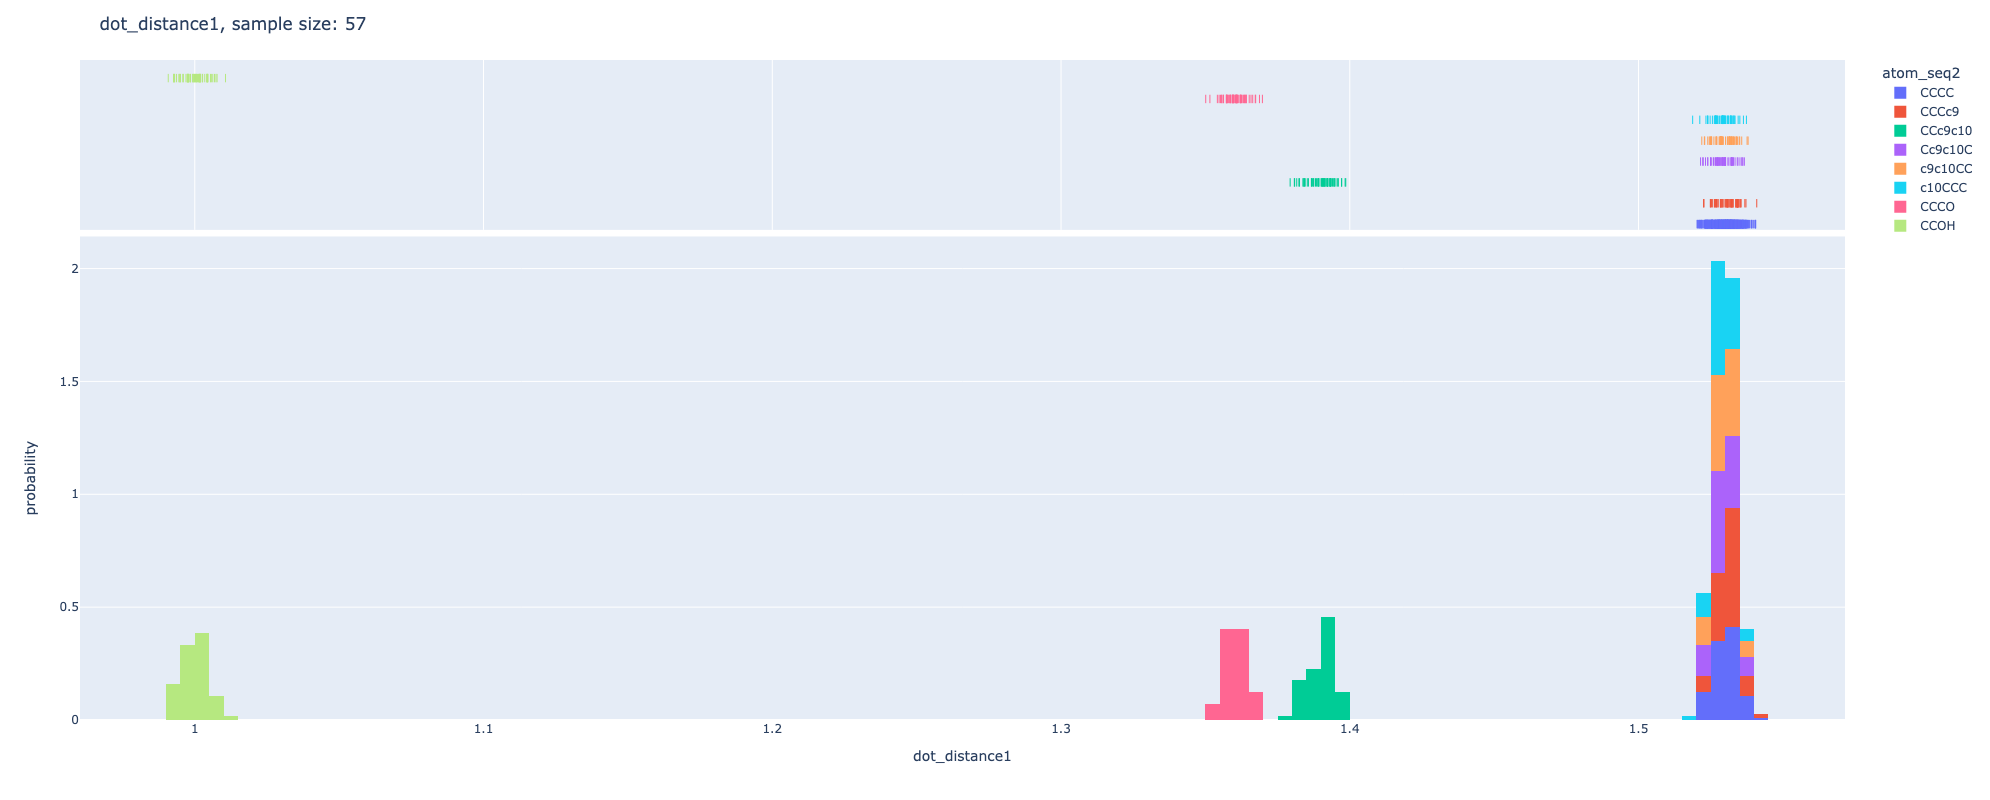

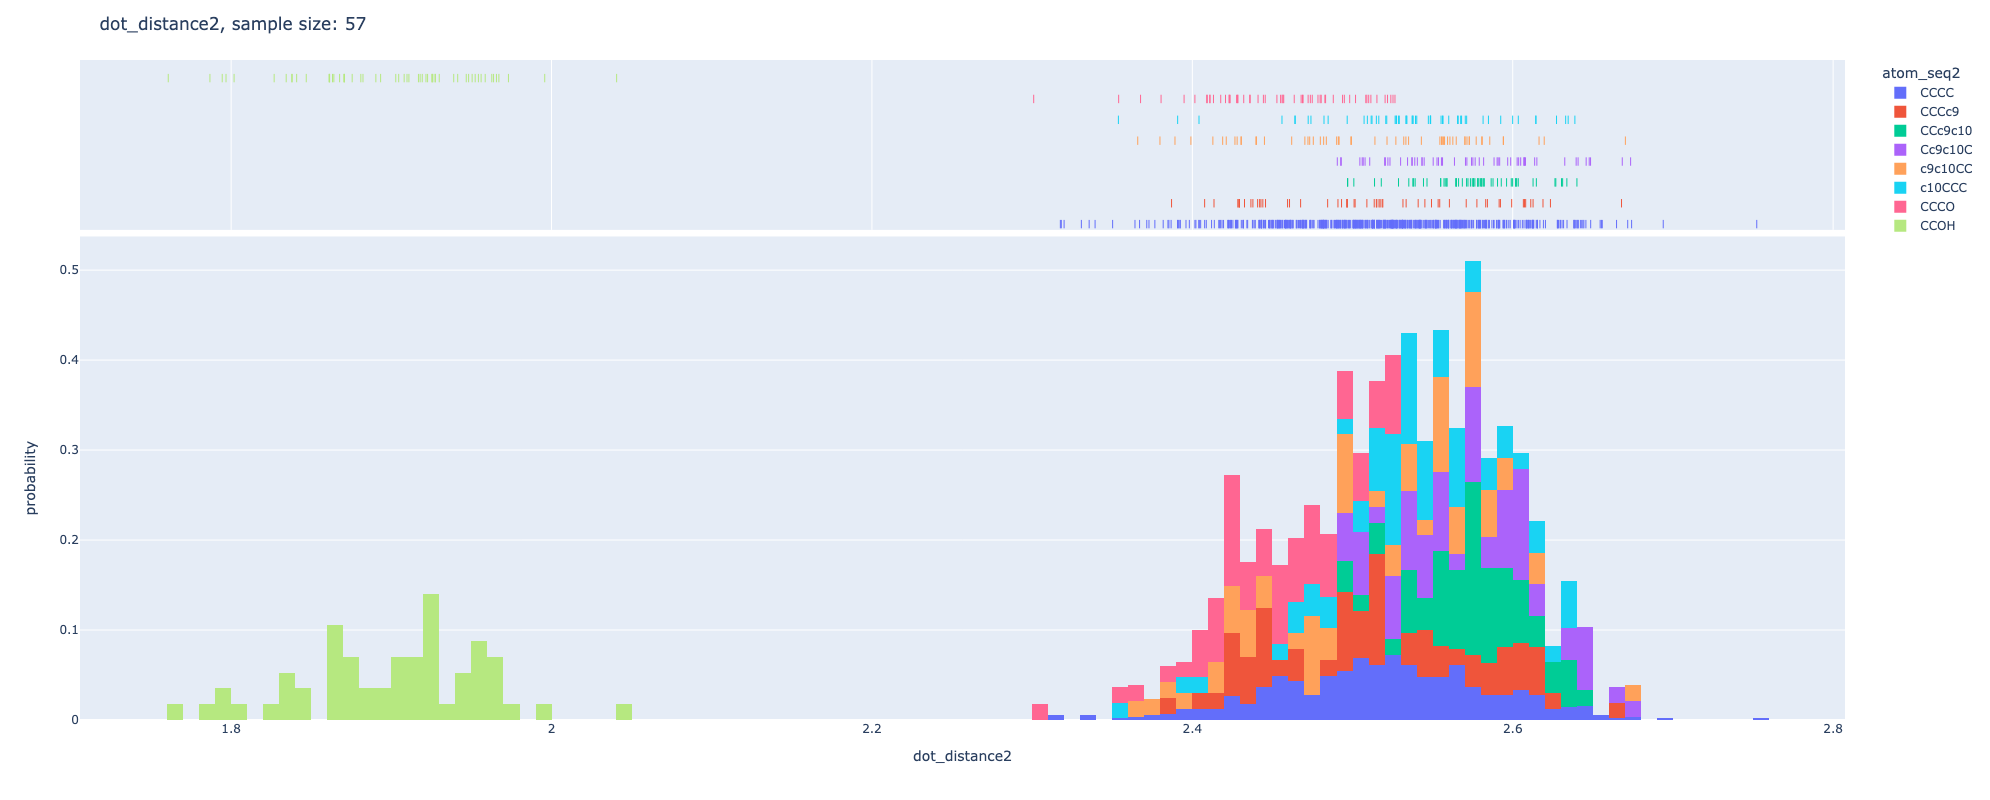

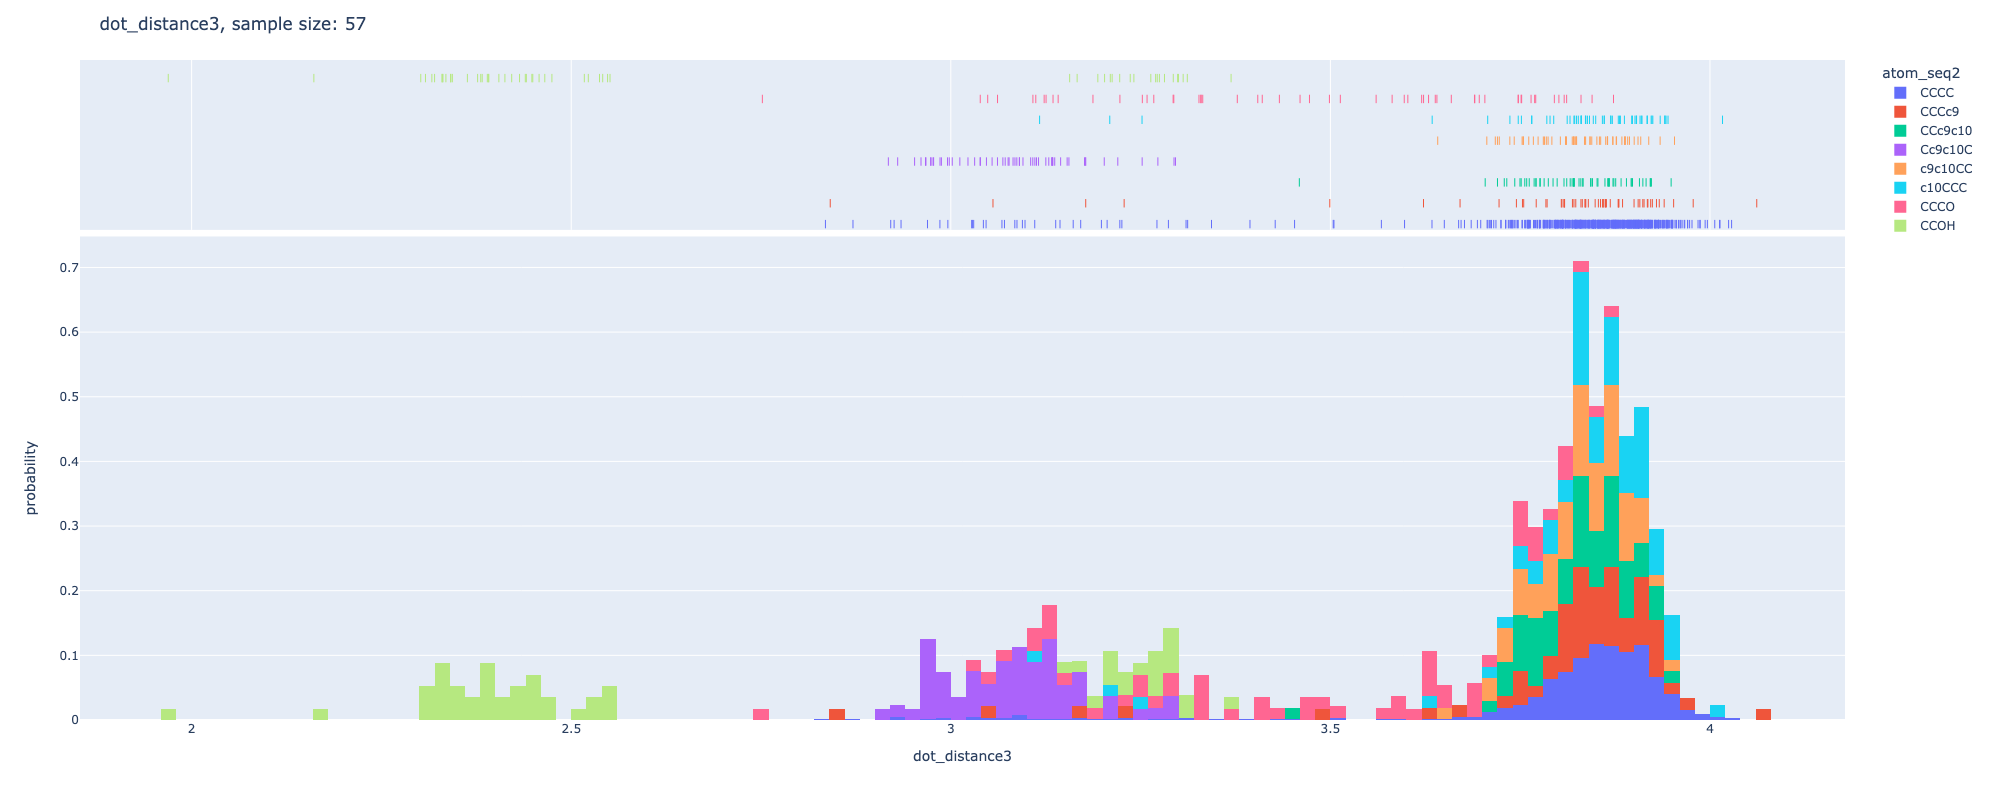

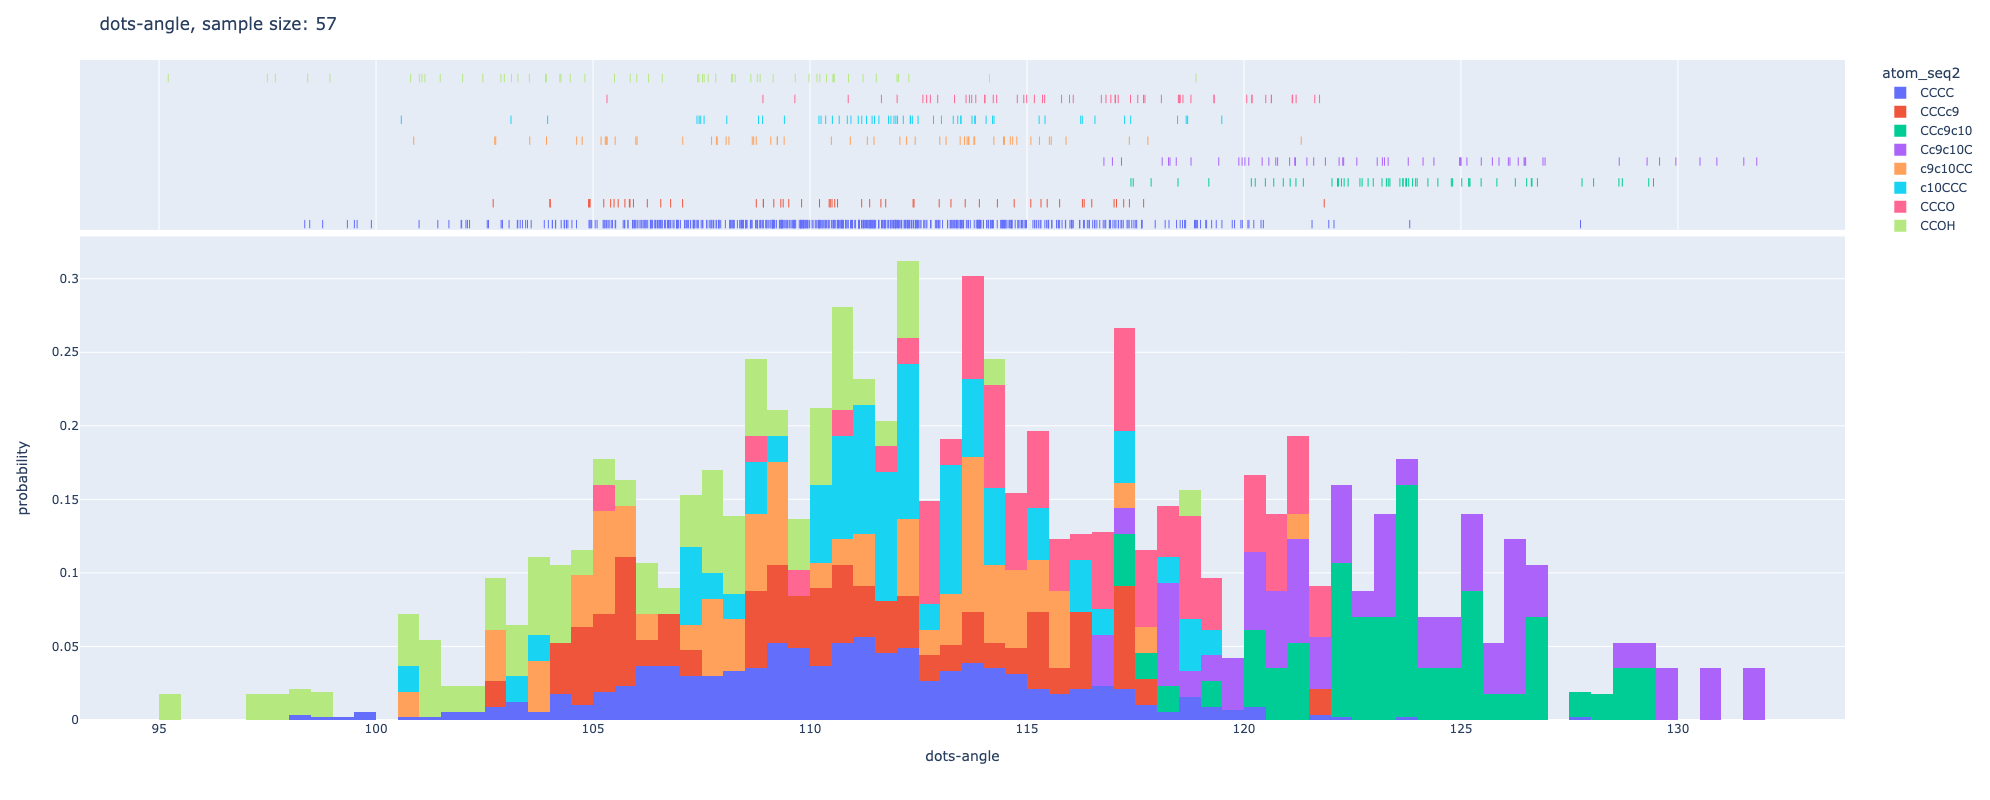

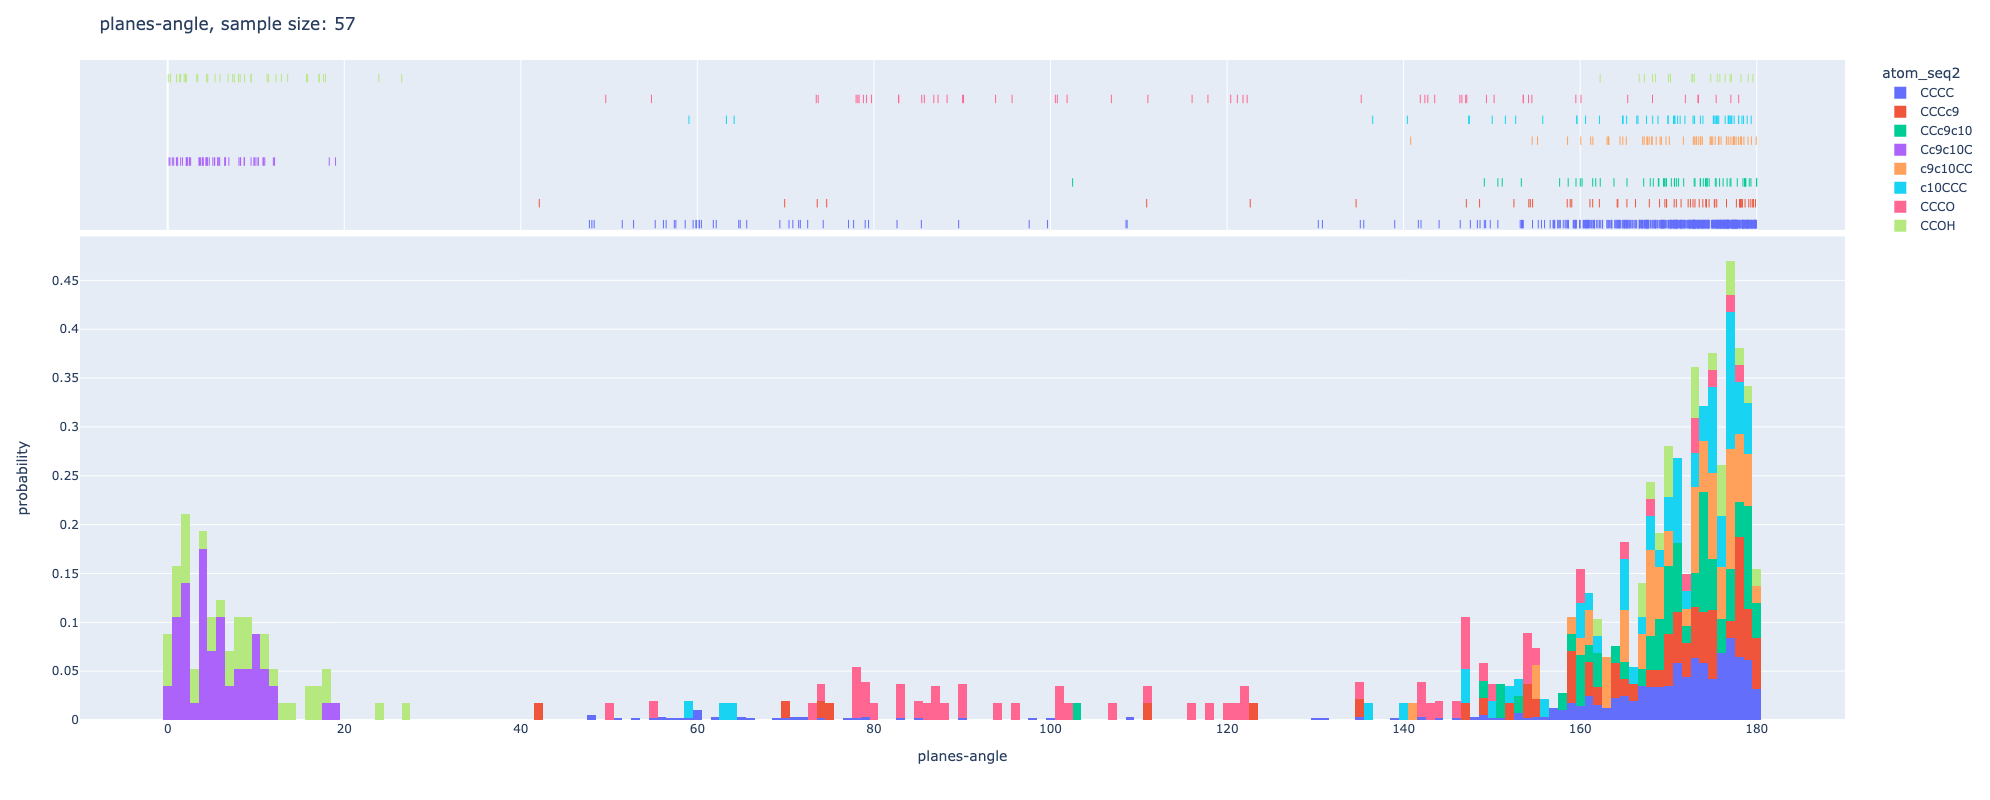

In [84]:
#protein_hist(df.dropna(),xlabel="dots-distance")
protein_hist(df.dropna(),xlabel="dot_distance1")
protein_hist(df.dropna(),xlabel="dot_distance2")
protein_hist(df.dropna(),xlabel="dot_distance3")
protein_hist(df.dropna(),xlabel="dots-angle")
protein_hist(df.dropna(),xlabel="planes-angle")

### Simulation

In [85]:
seq = 'atom_seq2'
#seq = 'atom_seq3'
#seq = 'Cx'
Cx = np.unique([c for c in df[seq] if c])
features = ['dots-angle','planes-angle', 'dot_distance1', 'dot_distance2', 'dot_distance3']
features_all = [seq]+ features 

In [86]:
Cx

array(['CCCC', 'CCCO', 'CCCc9', 'CCOH', 'CCc9c10', 'Cc9c10C', 'c10CCC',
       'c9c10CC'], dtype='<U7')

In [87]:
features

['dots-angle',
 'planes-angle',
 'dot_distance1',
 'dot_distance2',
 'dot_distance3']

In [88]:
features_all

['atom_seq2',
 'dots-angle',
 'planes-angle',
 'dot_distance1',
 'dot_distance2',
 'dot_distance3']

In [89]:
protein_distr = [ df[df[seq]==c][features_all] for c in Cx ]
atom2distr = dict(zip(Cx, protein_distr))

In [90]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][features_all].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [91]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

#C_tmp = ["C"+str(x) for x in range(1,19)]
C_tmp = Cx
C_tmp

array(['CCCC', 'CCCO', 'CCCc9', 'CCOH', 'CCc9c10', 'Cc9c10C', 'c10CCC',
       'c9c10CC'], dtype='<U7')

In [92]:
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

atom_seq2  dots-angle  planes-angle  dot_distance1  dot_distance2  \
393      CCCC  113.995910    166.916352       1.530392       2.564956   
717      CCCO  116.932372    111.027738       1.360919       2.463615   
707     CCCc9  106.560243    169.592077       1.533786       2.460671   
718      CCOH  107.560889    167.276902       1.000450       1.916925   
708   CCc9c10  128.057142    178.622563       1.391330       2.630456   
..        ...         ...           ...            ...            ...   
698      CCOH  103.905594    177.127736       0.990808       1.861478   
688   CCc9c10  117.396130    160.213530       1.386723       2.496998   
689   Cc9c10C  124.376911      4.457060       1.531307       2.581840   
691    c10CCC  103.109651    171.038082       1.527285       2.390837   
690   c9c10CC  114.458679    175.721920       1.525352       2.570175   

     dot_distance3  
393       3.872131  
717       3.513090  
707       3.785472  
718       3.293038  
708       3.820694  
..             ...  
698       3.210078  
688       3.768355  
689       2.960726  
691       3.811902  
690       3.883967  

[4000 rows x 6 columns]

In [93]:
def protein_sim_plot(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df[seq] == Cx[0])
    fig = px.histogram(df, x=xlabel, color=seq, nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

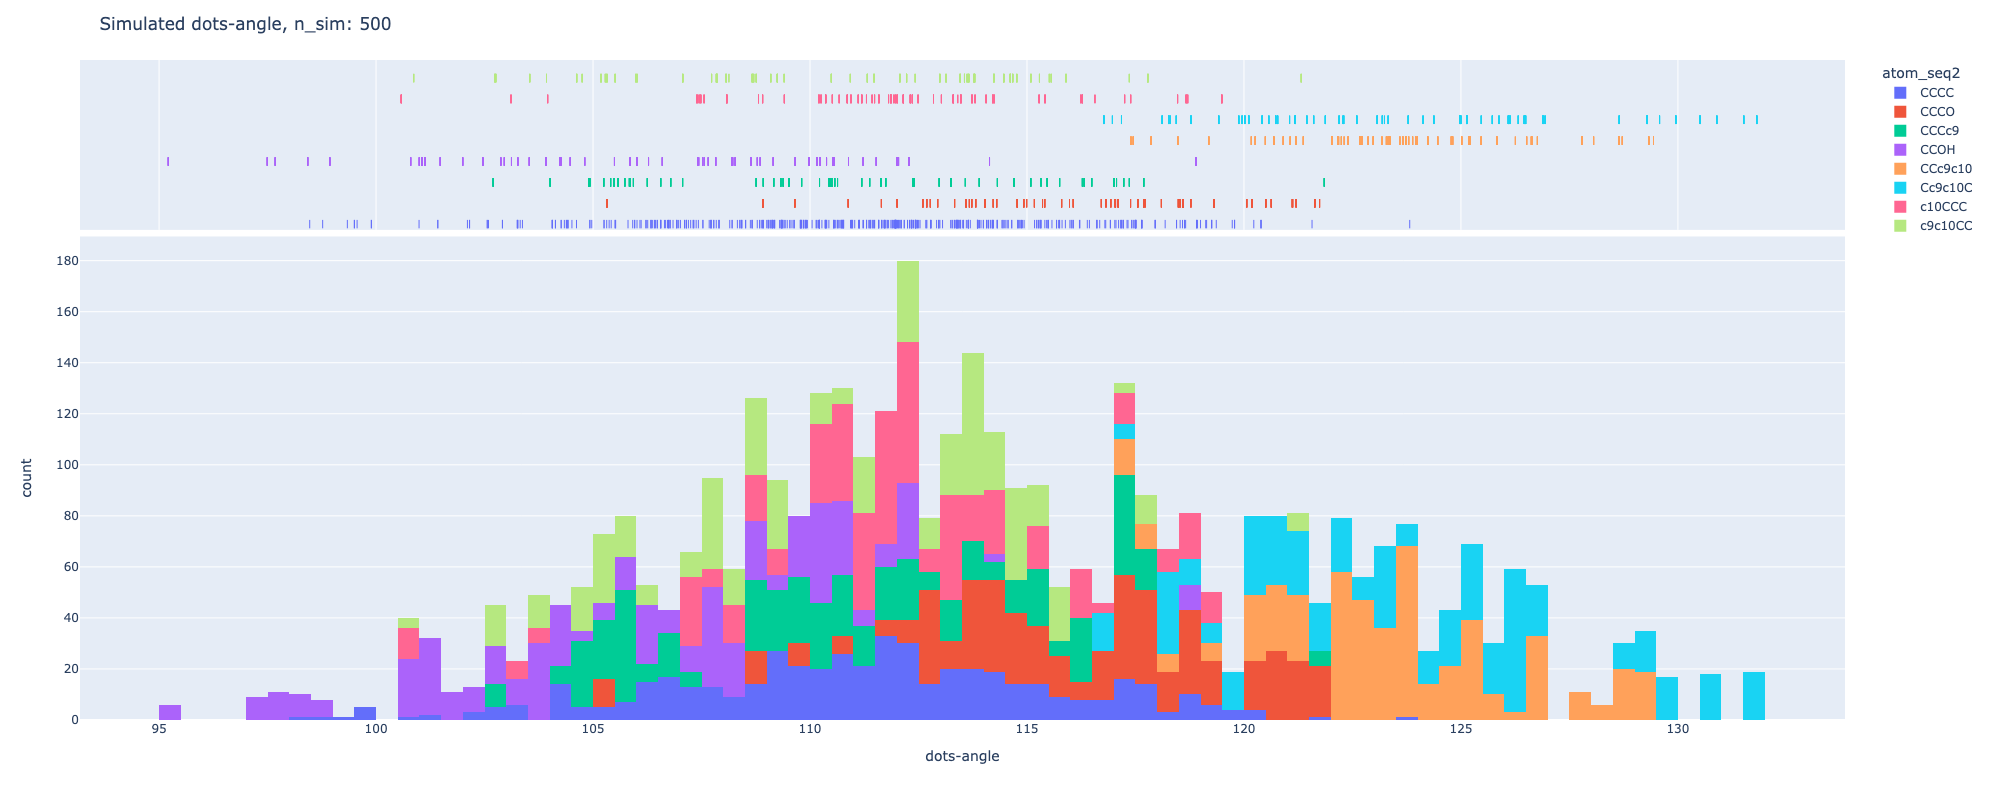

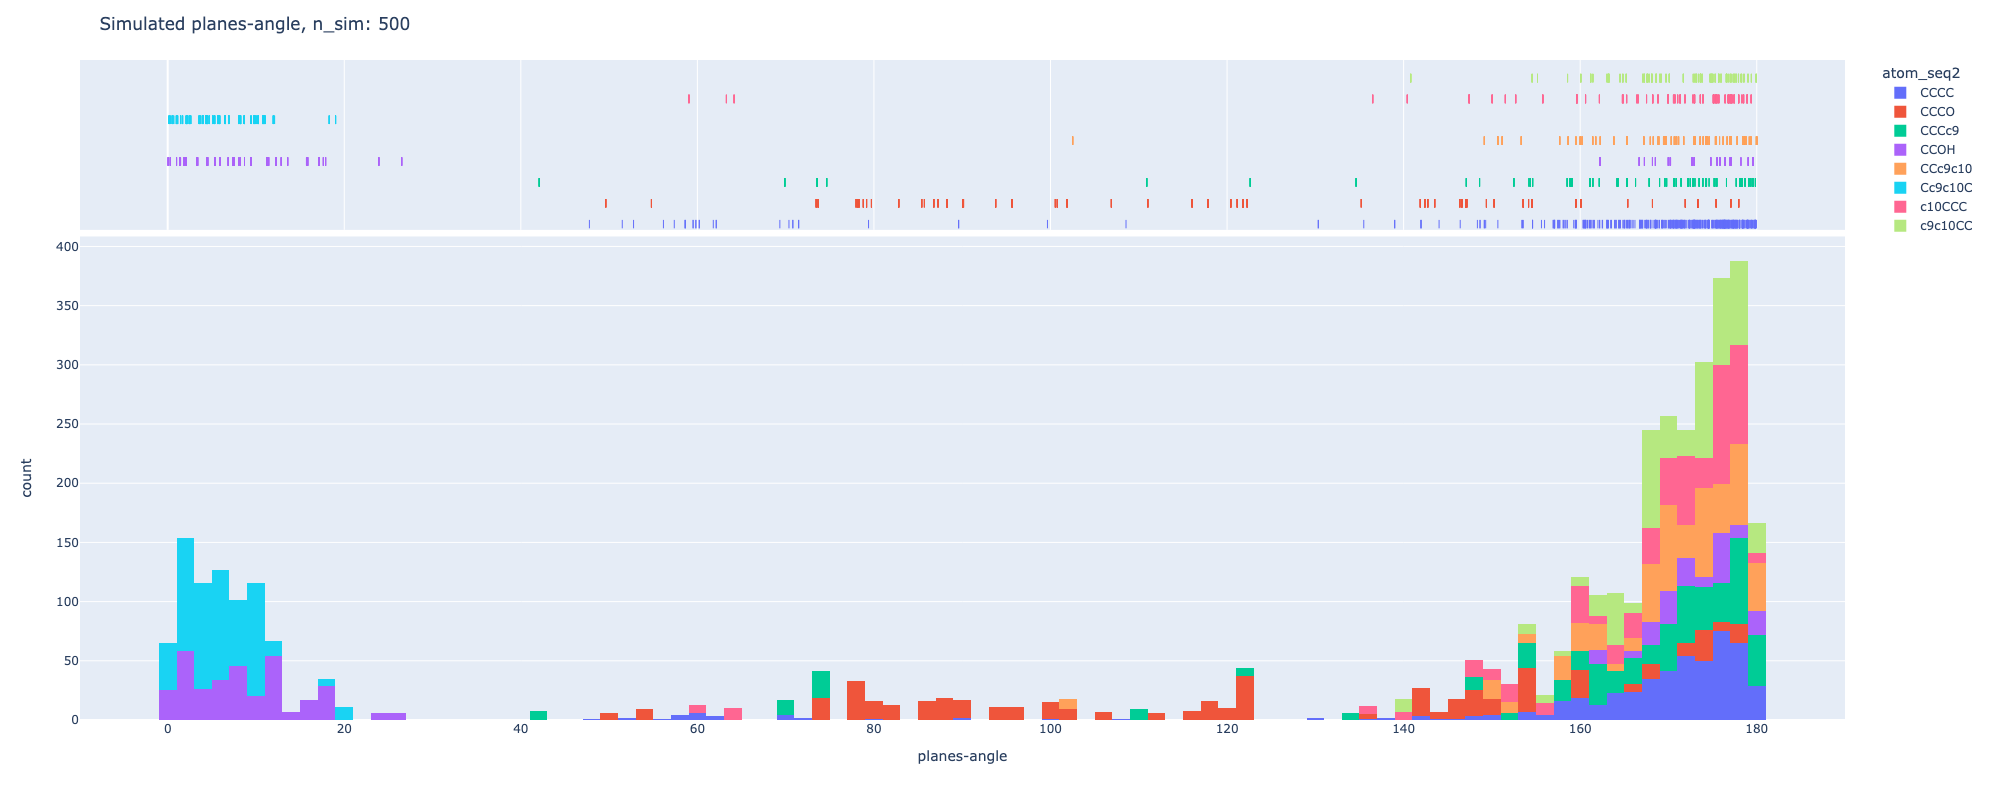

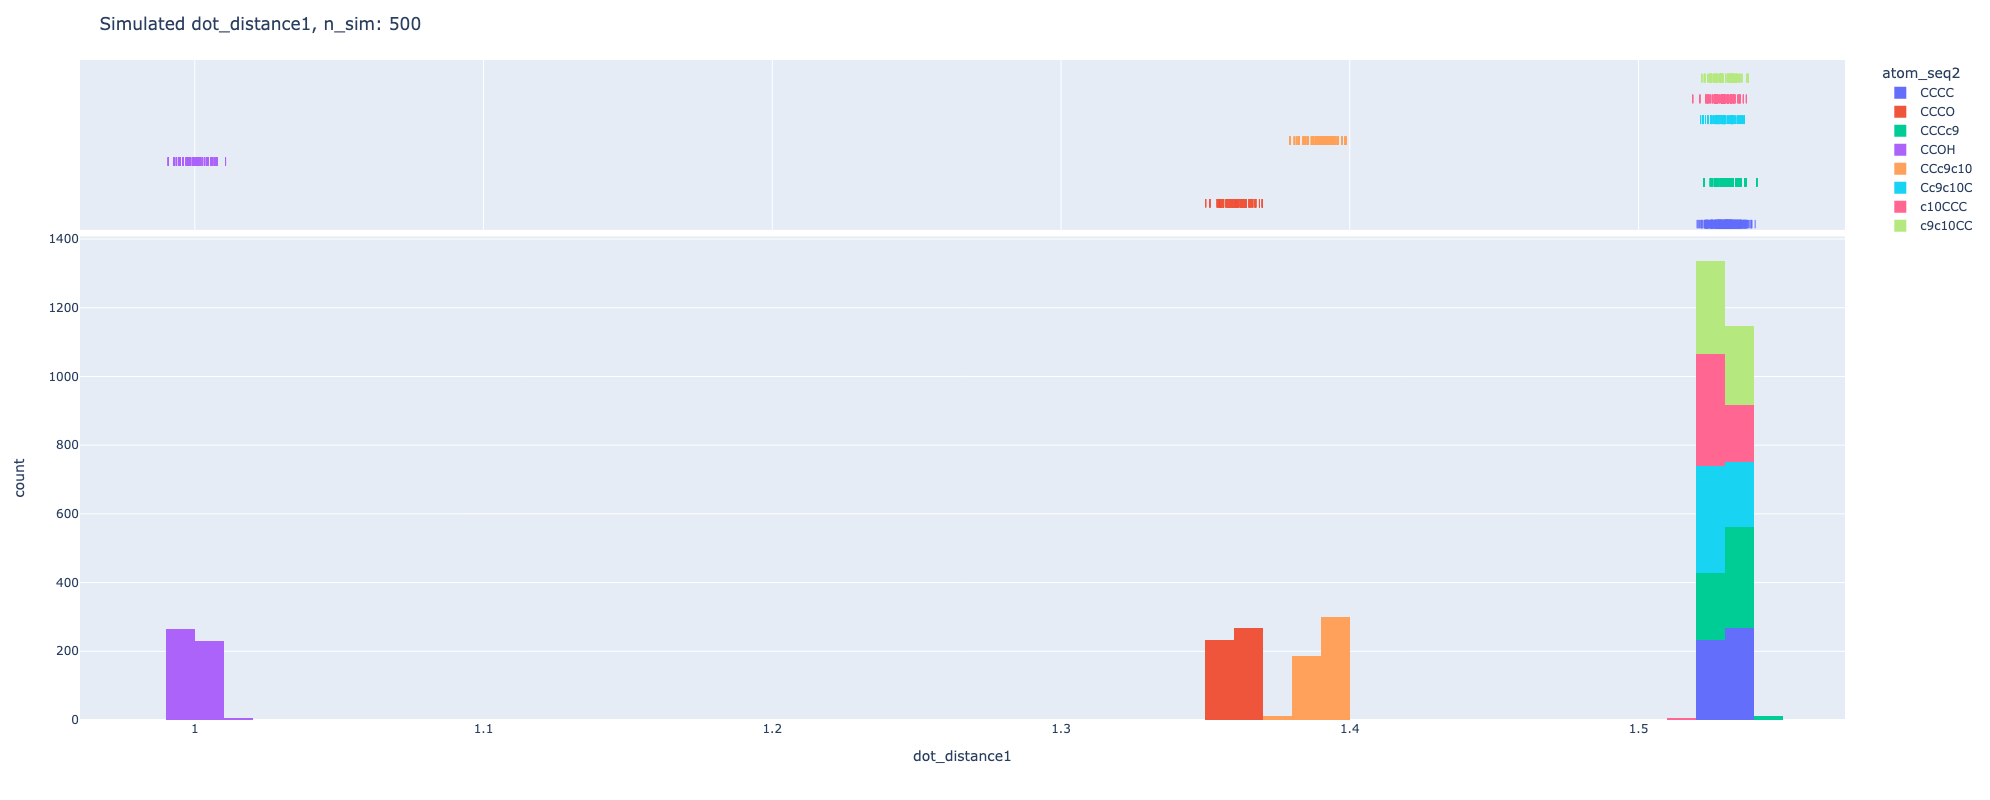

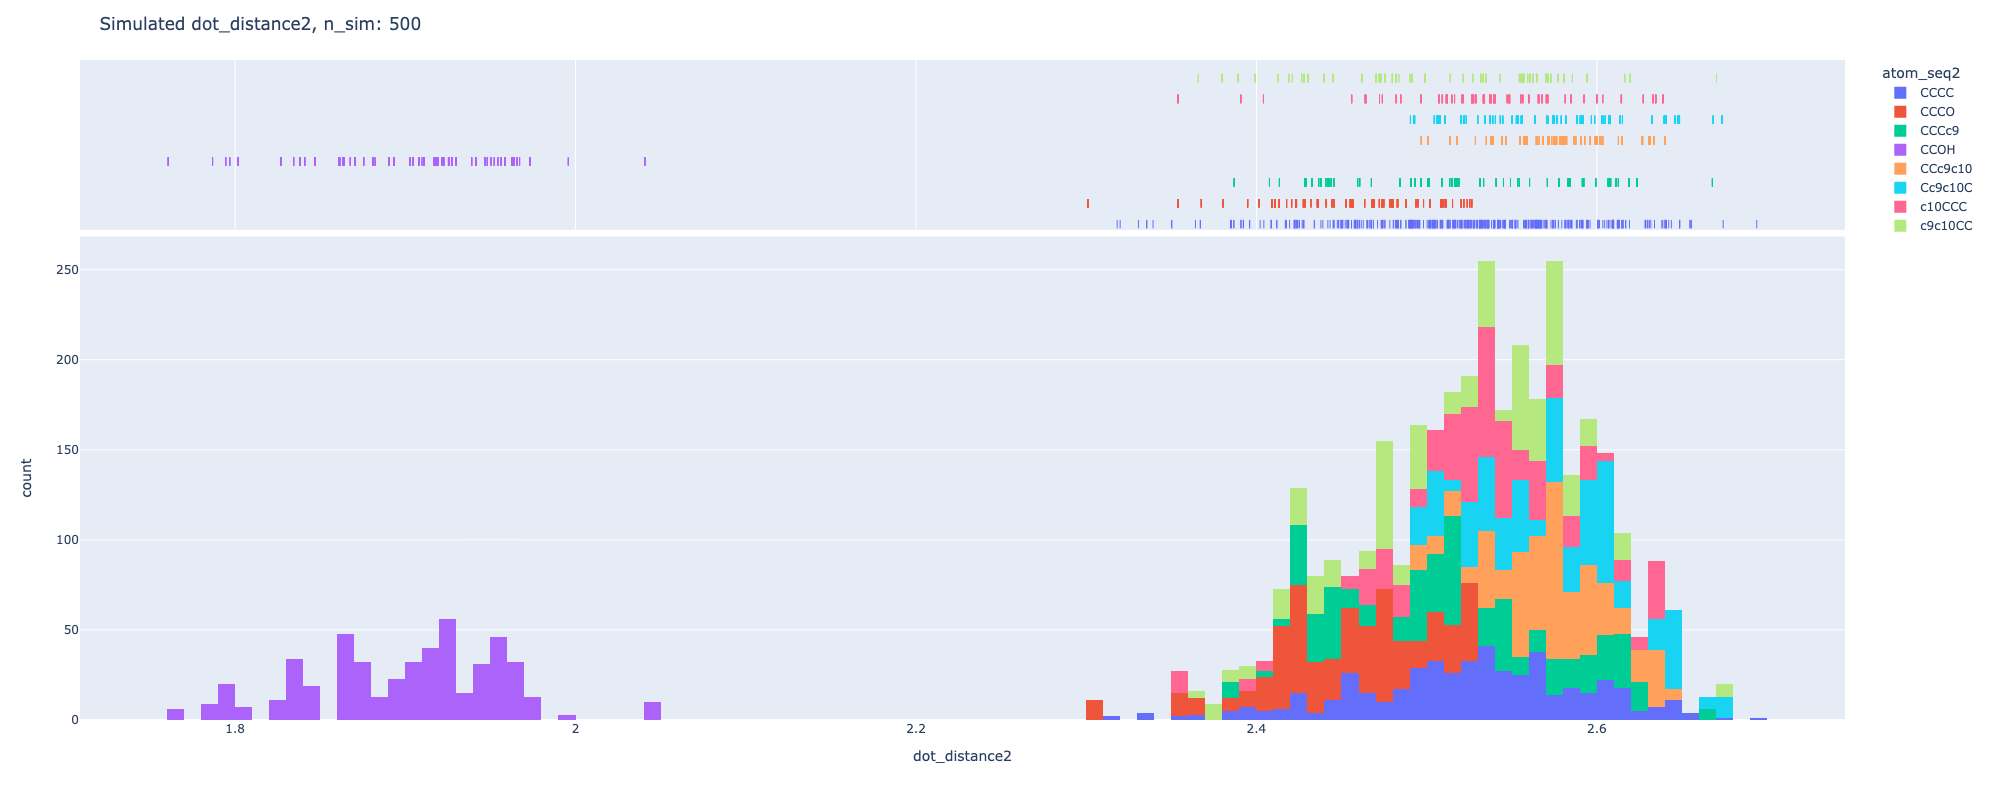

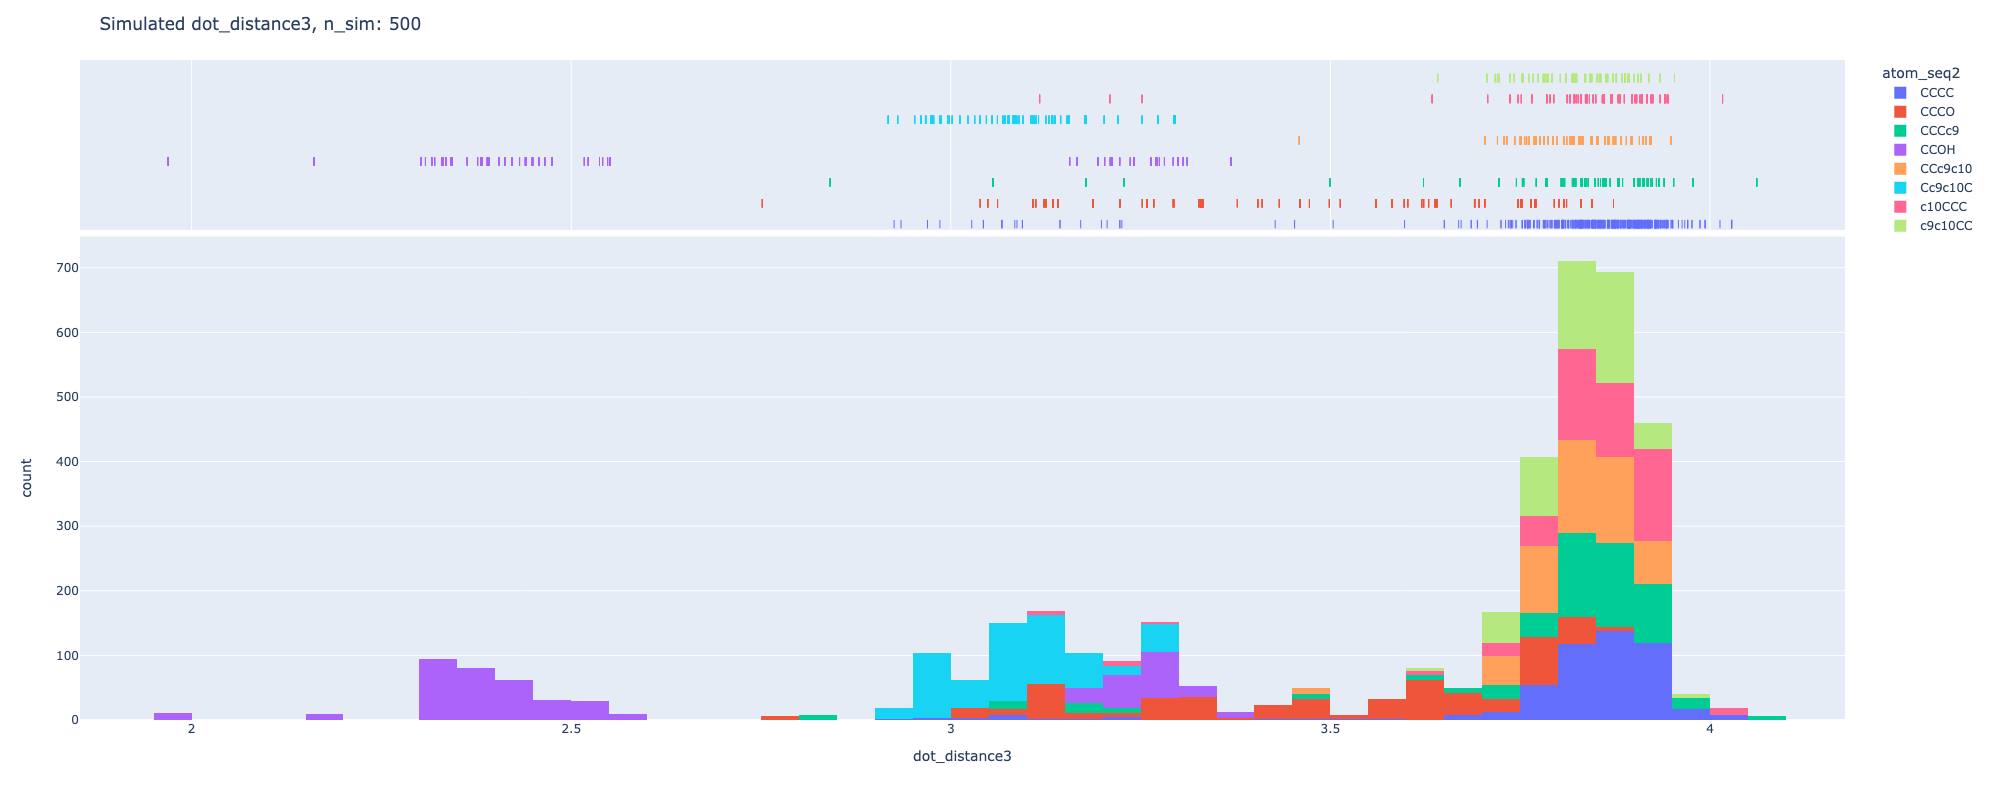

In [94]:
# protein_sim_plot(protine_sim_df,xlabel="dots-angle")
# protein_sim_plot(protine_sim_df,xlabel="planes-angle")
# protein_sim_plot(protine_sim_df,xlabel="dot_distance1")
for f in features:
    protein_sim_plot(protine_sim_df,xlabel=f)

In [95]:
def run_sim_df(data_sim, d=0, m=0):
    for k in range(m, len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = data_sim[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        d_max = np.argmax(l)
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_max, d_random], p=[0.95, 0.05])
        data_sim.at[k+3, 'X'] = xyz_sim[d][0]
        data_sim.at[k+3, 'Y'] = xyz_sim[d][1]
        data_sim.at[k+3, 'Z'] = xyz_sim[d][2]

In [96]:
data_sim

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1    0.0    0.0    0.0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

In [97]:
sim_df = pd.DataFrame(columns = list(data_sim.columns)+['dot_distance3'])
sim_df
seq_l = 20
k_double = 9
sim_df['REMARK'] = range(1,seq_l+1)
sim_df['4'] = ["C"+str(k) for k in range(1,seq_l+1)]
sim_df['1DPP'] = ['OLA' for k in range(1,seq_l+1)]
sim_df['COMPLIES'] = 1
sim_df['2.0,'] = 1.0
sim_df['18-NOV-1998'] = 0.0
#sim_df['18-NOV-1998'] df[df['atom_seq2'] == 'CCCC']['dots-distance'].sample(n=seq_l)
tmp = df[df['atom_seq2'] == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=seq_l)
tmp.index = sim_df.index
sim_df[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']] = tmp[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]

tmp2 = pd.concat([df[df['atom_seq2'] == 'CCCc9'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'CCc9c10'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'Cc9c10C'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'c9c10CC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1), 
                  df[df['atom_seq2'] == 'c10CCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)])
tmp2.index = range(k_double-2, k_double+3)
tmp2
for k in range(k_double-2, k_double+3):
    for c in tmp2.columns:
        sim_df.at[k, c] = tmp2.at[k, c]

#sim_df


for k in range(3):
    if k == 0:
        sim_df.at[k, 'X'] = 0.0
        sim_df.at[k, 'Y'] = 0.0
        sim_df.at[k, 'Z'] = 0.0
    if k == 1:
        sim_df.at[k, 'X'] = 0.0
        sim_df.at[k, 'Y'] = 0.0
        sim_df.at[k, 'Z'] = sim_df.at[k, 'dots-distance']
    if k == 2:
        delta = 180-sim_df.at[k, 'dots-angle']
        sim_df.at[k, 'Y'] = 0.0
        sim_df.at[k, 'Z'] = np.cos(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'Z']
        sim_df.at[k, 'X'] = np.sin(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'X']
#sim_df

m = 0
d = 0
for k in range(m, len(sim_df)-3):
    xyz_sim = solve_d(sim_df, k)
    #print('SIM: ', xyz_sim)
    #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
    ## replace observed XYX with simulated XYZ
    p1 = sim_df[['X','Y','Z']].iloc[k]
    l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
    #d_max = np.argmax(l)
    d_min = np.argmin([abs(sim_df['dot_distance3'].iloc[k+3] - x) for x in l])
    d_random = np.random.choice([0,1,2,3])
    d = np.random.choice([d_min, d_random], p=[0.999, 0.001])
    sim_df.at[k+3, 'X'] = xyz_sim[d][0]
    sim_df.at[k+3, 'Y'] = xyz_sim[d][1]
    sim_df.at[k+3, 'Z'] = xyz_sim[d][2]

sim_df

REMARK    4 1DPP  COMPLIES         X          Y         Z  2.0,  \
0        1   C1  OLA         1       0.0        0.0       0.0   1.0   
1        2   C2  OLA         1       0.0        0.0  1.533199   1.0   
2        3   C3  OLA         1  1.413985        0.0  2.112893   1.0   
3        4   C4  OLA         1  1.426175   0.299741  3.611361   1.0   
4        5   C5  OLA         1   2.56318  -0.341283  4.416661   1.0   
5        6   C6  OLA         1   2.67502   0.059351  5.891512   1.0   
6        7   C7  OLA         1  3.451698  -1.008568  6.663341   1.0   
7        8   C8  OLA         1  3.528477  -0.527549  8.113592   1.0   
8        9   C9  OLA         1  4.150765  -1.707645  8.862945   1.0   
9       10  C10  OLA         1  4.368821  -2.896595  8.167425   1.0   
10      11  C11  OLA         1  4.783302  -4.151406  8.936486   1.0   
11      12  C12  OLA         1  4.482273  -5.387513   8.08524   1.0   
12      13  C13  OLA         1  5.301622  -6.597295  8.545669   1.0   
13      14  C14  OLA         1  4.867111  -7.913522  7.888291   1.0   
14      15  C15  OLA         1  5.564307  -9.002543  8.717418   1.0   
15      16  C16  OLA         1  5.399473 -10.409449  8.133086   1.0   
16      17  C17  OLA         1  6.322421 -11.194974  9.073095   1.0   
17      18  C18  OLA         1  6.505308 -12.648375  8.606533   1.0   
18      19  C19  OLA         1  7.003106 -13.554595  9.736825   1.0   
19      20  C20  OLA         1  6.664993 -14.995084  9.325158   1.0   

    18-NOV-1998  dots-angle  dots-distance  planes-angle  dot_distance3  
0           0.0  119.492069       1.527121    164.307382       3.996574  
1           0.0  109.811847       1.533199    135.090618       3.797868  
2           0.0  112.292245       1.528202    167.761391       3.806324  
3           0.0  116.026835       1.533688    149.812529       3.955427  
4           0.0  116.756064       1.532384    174.046323       3.819044  
5           0.0  109.888890       1.529510    158.286438       3.858303  
6           0.0  106.518089       1.529869    179.474105       3.786674  
7           0.0  104.013958       1.530163    172.999923       3.835675  
8           0.0  118.479865       1.394597    174.195252       3.807703  
9           0.0  119.419321       1.528987      9.440816       3.038602  
10          0.0  109.250216       1.530751    160.068206       3.820864  
11          0.0  111.430940       1.531960    159.616381       3.789314  
12          0.0  113.407944       1.534080    170.160577       3.927849  
13          0.0  104.384533       1.536066    167.002788       3.763243  
14          0.0  113.345853       1.532319    173.260196       3.873203  
15          0.0   99.891917       1.533786    173.661557       3.774983  
16          0.0  111.701147       1.537368    172.469475       3.824108  
17          0.0  111.962678       1.531862    160.533130       3.909591  
18          0.0  106.591048       1.535839    159.969925       3.788892  
19          0.0  109.902953       1.530588    178.399362       3.867170

In [98]:
    sim_df = pd.DataFrame(columns = list(data_sim.columns)+['dot_distance3'])
    sim_df
    seq_l = 20
    k_double = 9
    sim_df['REMARK'] = range(1,seq_l+1)
    sim_df['4'] = ["C"+str(k) for k in range(1,seq_l+1)]
    sim_df['1DPP'] = ['OLA' for k in range(1,seq_l+1)]
    sim_df['COMPLIES'] = 1
    sim_df['2.0,'] = 1.0
    sim_df['18-NOV-1998'] = 0.0
    #sim_df['18-NOV-1998'] df[df['atom_seq2'] == 'CCCC']['dots-distance'].sample(n=seq_l)
    tmp = df[df['atom_seq2'] == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=seq_l)
    tmp.index = sim_df.index
    sim_df[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']] = tmp[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
   
    tmp2 = pd.concat([df[df['atom_seq2'] == 'CCCc9'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'CCc9c10'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'Cc9c10C'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'c9c10CC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1), 
                  df[df['atom_seq2'] == 'c10CCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)])
    tmp2.index = range(k_double-2, k_double+3)
    for k in range(k_double-2, k_double+3):
        for c in tmp2.columns:
            sim_df.at[k, c] = tmp2.at[k, c]            

    tmp3 = df[df['atom_seq2'] == 'CCCO'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)
    tmp4 = df[df['atom_seq2'] == 'CCOH'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)
    tmp3.index = range(len(tmp3))
    tmp4.index = range(len(tmp4))
    for c in tmp3.columns:
        sim_df.at[seq_l-2,c] = tmp3.at[0, c]   
    for c in tmp4.columns:
        sim_df.at[seq_l-1,c] = tmp4.at[0, c]
    sim_df.at[seq_l-2,'4'] = "O"+str(seq_l-1)
    sim_df.at[seq_l-1,'4'] = "H"+str(seq_l)
    
    sim_df

REMARK    4 1DPP  COMPLIES    X    Y    Z  2.0,  18-NOV-1998  dots-angle  \
0        1   C1  OLA         1  NaN  NaN  NaN   1.0          0.0  112.035010   
1        2   C2  OLA         1  NaN  NaN  NaN   1.0          0.0  110.733766   
2        3   C3  OLA         1  NaN  NaN  NaN   1.0          0.0  101.961090   
3        4   C4  OLA         1  NaN  NaN  NaN   1.0          0.0  106.527311   
4        5   C5  OLA         1  NaN  NaN  NaN   1.0          0.0  100.990877   
5        6   C6  OLA         1  NaN  NaN  NaN   1.0          0.0  108.419473   
6        7   C7  OLA         1  NaN  NaN  NaN   1.0          0.0  112.621292   
7        8   C8  OLA         1  NaN  NaN  NaN   1.0          0.0  116.493169   
8        9   C9  OLA         1  NaN  NaN  NaN   1.0          0.0  122.028828   
9       10  C10  OLA         1  NaN  NaN  NaN   1.0          0.0  125.877184   
10      11  C11  OLA         1  NaN  NaN  NaN   1.0          0.0  121.319373   
11      12  C12  OLA         1  NaN  NaN  NaN   1.0          0.0  113.478515   
12      13  C13  OLA         1  NaN  NaN  NaN   1.0          0.0  115.494820   
13      14  C14  OLA         1  NaN  NaN  NaN   1.0          0.0  106.921759   
14      15  C15  OLA         1  NaN  NaN  NaN   1.0          0.0  115.723562   
15      16  C16  OLA         1  NaN  NaN  NaN   1.0          0.0  110.960805   
16      17  C17  OLA         1  NaN  NaN  NaN   1.0          0.0  112.482066   
17      18  C18  OLA         1  NaN  NaN  NaN   1.0          0.0  111.863251   
18      19  O19  OLA         1  NaN  NaN  NaN   1.0          0.0  116.932372   
19      20  H20  OLA         1  NaN  NaN  NaN   1.0          0.0  101.125858   

    dots-distance  planes-angle  dot_distance3  
0        1.533688    173.364176       3.891953  
1        1.527711    161.868069       3.822892  
2        1.521841    158.663191       3.711240  
3        1.532710    179.671310       3.709380  
4        1.532123    175.143931       3.806061  
5        1.530163    168.736091       3.852700  
6        1.531045    170.818407       3.899718  
7        1.531307    171.427775       3.879201  
8        1.392300    170.701542       3.911585  
9        1.528594      2.142989       2.995680  
10       1.535741    155.164452       3.953264  
11       1.532645    172.783887       3.849480  
12       1.530131    176.729719       3.847012  
13       1.531372    165.876663       3.861684  
14       1.531731    175.711472       3.938350  
15       1.529510    171.373087       3.881726  
16       1.528954    168.254063       3.881829  
17       1.533819    163.575472       3.939556  
18       1.360919    111.027738       3.513090  
19       0.992673    170.211721       3.212522

In [99]:
sim_df.at[seq_l-1, c]

3.212522373462943

In [100]:
tmp3

dots-angle  dots-distance  planes-angle  dot_distance3
0  116.932372       1.360919    111.027738        3.51309

In [101]:
tmp4

dots-angle  dots-distance  planes-angle  dot_distance3
0  101.125858       0.992673    170.211721       3.212522

In [102]:
data_sim.head(25)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1   0.0   0.0    0.0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   
21      22   C1  OLA         2  1.32  -4.4   0.13   1.0          0.0   
22      23   C2  OLA         2  2.44 -5.27  -0.45   1.0          0.0   
23      24   C3  OLA         2  3.71 -4.43  -0.64   1.0          0.0   
24      25   C4  OLA         2  4.22 -4.67  -2.07   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
5   109.130631       1.529379     62.135786  
6   127.755005       1.536066    173.786140  
7   115.752242       1.524893    178.162792  
8   122.155375       1.393341    162.270369  
9   126.320389       1.523975      5.695876  
10  109.403913       1.528332    173.424474  
11  117.388916       1.531698     64.163301  
12  112.535424       1.529052    175.129467  
13  111.125859       1.525320    170.479853  
14  114.208054       1.530555    173.370432  
15  109.992593       1.528202    167.709527  
16  115.575398       1.527613    174.978988  
17  120.894351       1.231828     27.576745  
18   29.208989       2.298652    170.093365  
19   69.045526       0.997497    179.487648  
20   29.773027      20.698717      6.884002  
21   62.985014       1.532221     10.369650  
22  109.939333       1.534471     78.123116  
23  107.718071       1.537075    130.333155  
24  116.427502       1.523319    179.664466

In [103]:
def sim_seq(seq_l = 20, k_double = 9):
    sim_df = pd.DataFrame(columns = list(data_sim.columns)+['dot_distance3'])
    sim_df
    #seq_l = 20
    #k_double = 9
    sim_df['REMARK'] = range(1,seq_l+1)
    sim_df['4'] = ["C"+str(k) for k in range(1,seq_l+1)]
    sim_df['1DPP'] = ['OLA' for k in range(1,seq_l+1)]
    sim_df['COMPLIES'] = 1
    sim_df['2.0,'] = 1.0
    sim_df['18-NOV-1998'] = 0.0
    #sim_df['18-NOV-1998'] df[df['atom_seq2'] == 'CCCC']['dots-distance'].sample(n=seq_l)
    tmp = df[df['atom_seq2'] == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=seq_l)
    tmp.index = sim_df.index
    sim_df[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']] = tmp[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
   
    tmp2 = pd.concat([df[df['atom_seq2'] == 'CCCc9'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'CCc9c10'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'Cc9c10C'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
                  df[df['atom_seq2'] == 'c9c10CC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1), 
                  df[df['atom_seq2'] == 'c10CCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)])
    tmp2.index = range(k_double-2, k_double+3)
    for k in range(k_double-2, k_double+3):
        for c in tmp2.columns:
            sim_df.at[k, c] = tmp2.at[k, c]

    tmp3 = df[df['atom_seq2'] == 'CCCO'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)
    tmp4 = df[df['atom_seq2'] == 'CCOH'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)
    tmp3.index = range(len(tmp3))
    tmp4.index = range(len(tmp4))
    for c in tmp3.columns:
        sim_df.at[seq_l-3,c] = tmp3.at[0, c]   
    for c in tmp4.columns:
        sim_df.at[seq_l-2,c] = tmp4.at[0, c]
    sim_df.at[seq_l-2,'4'] = "O"+str(seq_l-1)
    sim_df.at[seq_l-1,'4'] = "H"+str(seq_l)


    #sim_df
    for k in range(3):
        if k == 0:
            sim_df.at[k, 'X'] = 0.0
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = 0.0
        if k == 1:
            sim_df.at[k, 'X'] = 0.0
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = sim_df.at[k, 'dots-distance']
        if k == 2:
            delta = 180-sim_df.at[k, 'dots-angle']
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = np.cos(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'Z']
            sim_df.at[k, 'X'] = np.sin(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'X']
    #sim_df

    m = 0
    d = 0
    for k in range(m, len(sim_df)-3):
        xyz_sim = solve_d(sim_df, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = sim_df[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        #d_max = np.argmax(l)
        d_min = np.argmin([abs(sim_df['dot_distance3'].iloc[k+3] - x) for x in l])
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_min, d_random], p=[0.9999, 0.0001])
        sim_df.at[k+3, 'X'] = xyz_sim[d][0]
        sim_df.at[k+3, 'Y'] = xyz_sim[d][1]
        sim_df.at[k+3, 'Z'] = xyz_sim[d][2]
        
    # Append 'O' oxygen as another branch
    j = seq_l - 1
    A =[list(sim_df['X'])[j-1], list(sim_df['Y'])[j-1], list(sim_df['Z'])[j-1]]
    B = [list(sim_df['X'])[j-2], list(sim_df['Y'])[j-2], list(sim_df['Z'])[j-2]]
    C = [list(sim_df['X'])[j-3], list(sim_df['Y'])[j-3], list(sim_df['Z'])[j-3]]
    D = dots_extend_mirror(A, B, C)
    sim_df = sim_df.append({'REMARK':str(j+2), '4':'O'+str(j+2), '1DPP':'OLA', 'COMPLIES':1, '18-NOV-1998':0.0, '2.0':1.0,
               'X': D[0], 'Y': D[1], 'Z': D[2]}, ignore_index=True)

    return(sim_df)

In [197]:
n_sim = 3
seq_l = 20
k_double = 9
sim_all = []
for k in range(n_sim):
    tmp_sim = sim_seq(seq_l, k_double)
    tmp_sim['COMPLIES'] = k+1
    sim_all.append(tmp_sim)
    
sim_df = pd.concat(sim_all)
sim_df

REMARK    4 1DPP  COMPLIES         X          Y         Z  2.0,  \
0       1   C1  OLA         1       0.0        0.0       0.0   1.0   
1       2   C2  OLA         1       0.0        0.0  1.527514   1.0   
2       3   C3  OLA         1  1.423891        0.0  2.067361   1.0   
3       4   C4  OLA         1  1.494666   0.727104  3.403479   1.0   
4       5   C5  OLA         1    2.9413   0.937907  3.838693   1.0   
..    ...  ...  ...       ...       ...        ...       ...   ...   
16     17  C17  OLA         3  7.058351 -11.936158  7.447169   1.0   
17     18  C18  OLA         3  7.204273 -12.602428  6.078305   1.0   
18     19  O19  OLA         3  8.428823 -12.641842  5.482969   1.0   
19     20  H20  OLA         3   8.34549 -12.734172  4.483354   1.0   
20     21  O21  OLA         3  6.004038 -13.225371  5.363898   NaN   

    18-NOV-1998  dots-angle  dots-distance  planes-angle  dot_distance3  2.0  
0           0.0  106.339664       1.533819    177.633814       3.842018  NaN  
1           0.0  115.808314       1.527514     47.770781       2.934434  NaN  
2           0.0  110.763465       1.522793    149.293135       3.877035  NaN  
3           0.0  111.125859       1.525320    170.479853       3.886245  NaN  
4           0.0  111.997008       1.528071    149.142077       3.786423  NaN  
..          ...         ...            ...           ...            ...  ...  
16          0.0  105.806369       1.529379    170.740953       3.740174  NaN  
17          0.0  119.311598       1.362167     85.415068       3.326875  NaN  
18          0.0  111.222371       1.007323     23.920474       2.547901  NaN  
19          0.0  106.156544       1.524369    175.666791       3.824827  NaN  
20          0.0         NaN            NaN           NaN            NaN  1.0  

[63 rows x 14 columns]

In [198]:
sim_df.index = ['ATOM' for k in range(len(sim_df))]
sim_df['REMARK'] = range(1,len(sim_df)+1)

sim_df['X'] = sim_df['X'].astype(np.double)
sim_df['Y'] = sim_df['Y'].astype(np.double)
sim_df['Z'] = sim_df['Z'].astype(np.double)

sim_df = sim_df.round(3)
sim_df['COMPLIES'] = sim_df['COMPLIES'].astype(np.int)
sim_df['REMARK'] = sim_df['REMARK'].astype(np.int)
sim_df[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')

In [199]:
os.system('sh csv2pdb.sh')

0

In [200]:
x = os.popen('cat data_sim_all.pdb').read().split('\n')[:-1]
if n_sim > 1:
    l_model = list(range(0,len(sim_df), int(len(sim_df)/n_sim)))
    x[1] = "\n".join(["MODEL", x[1]])
    for l in l_model[1:]:
        x[l] = "\n".join([x[l], "ENDMDL","MODEL"])
    x[-1] = x[-1]+"\nENDMDL"       
with open("data_sim_all_group.pdb", "w") as fout:
    fout.write("\n".join(x))

In [109]:
sim_df

REMARK    4 1DPP  COMPLIES       X      Y       Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.000  0.000   0.000   1.0          0.0   
ATOM       2   C2  OLA         1   0.000  0.000   1.529   1.0          0.0   
ATOM       3   C3  OLA         1   1.406  0.000   2.133   1.0          0.0   
ATOM       4   C4  OLA         1   1.415 -0.258   3.641   1.0          0.0   
ATOM       5   C5  OLA         1   2.771  0.295   4.092   1.0          0.0   
...      ...  ...  ...       ...     ...    ...     ...   ...          ...   
ATOM     101  C17  OLA         5  10.507  1.773  13.450   1.0          0.0   
ATOM     102  C18  OLA         5  11.513  2.583  12.610   1.0          0.0   
ATOM     103  O19  OLA         5  12.743  2.160  13.016   1.0          0.0   
ATOM     104  H20  OLA         5  13.452  2.769  12.652   1.0          0.0   
ATOM     105  O21  OLA         5  11.784  3.646  11.528   NaN          0.0   

      dots-angle  dots-distance  planes-angle  dot_distance3  2.0  
ATOM     105.806          1.529       170.741          3.740  NaN  
ATOM     111.139          1.529       165.396          3.884  NaN  
ATOM     113.229          1.530       169.417          3.961  NaN  
ATOM     103.574          1.532       159.470          3.781  NaN  
ATOM     109.940          1.532       176.836          3.851  NaN  
...          ...            ...           ...            ...  ...  
ATOM     110.879          1.541       170.906          3.906  NaN  
ATOM     105.321          1.362        90.045          3.108  NaN  
ATOM     109.977          1.003        11.433          2.522  NaN  
ATOM     109.136          1.532        64.855          2.921  NaN  
ATOM         NaN            NaN           NaN            NaN  1.0  

[105 rows x 14 columns]

In [101]:
dataset = df[df['atom_seq2'] == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
dataset

dots-angle  dots-distance  planes-angle  dot_distance3
2     118.529798       1.534764    179.858227       3.918673
3     104.618734       1.530131    176.528730       3.878041
4     110.738952       1.528692    173.205899       3.809396
5     109.130631       1.529379     62.135786       2.969276
6     127.755005       1.536066    173.786140       3.984269
...          ...            ...           ...            ...
1132  116.919425       1.535643    169.252049       3.950506
1133  112.266062       1.533167     77.698841       3.309879
1134  117.327613       1.533297    167.441551       3.949759
1135  112.042305       1.525287    163.905401       3.930407
1136  108.630341       1.529542    130.801374       3.676602

[570 rows x 4 columns]

In [102]:
# ! pip3 install seaborn
# ! pip3 install fitter

In [103]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

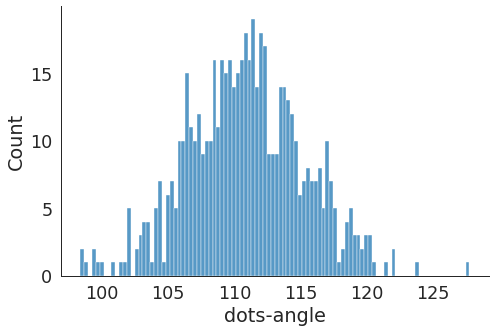

In [104]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="dots-angle", kind="hist", bins = 100, aspect = 1.5)

In [105]:
model_fit = {}
for c in dataset.columns:
    print(c)
    f = Fitter(dataset[c].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
    f.fit()
    #f.get_best(method = 'sumsquare_error')
    model_fit[c] = f

dots-angle
dots-distance
planes-angle
dot_distance3


{'beta': {'a': 287.83365964372626,
  'b': 19324830.68105617,
  'loc': 36.12967694773557,
  'scale': 5019478.341006499}}

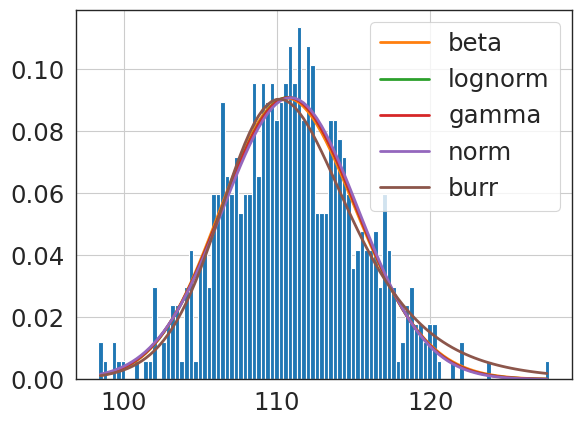

In [106]:
model_fit['dots-angle'].summary()
model_fit['dots-angle'].get_best(method = 'sumsquare_error')

{'norm': {'loc': 1.5300210573925601, 'scale': 0.0040547661257200815}}

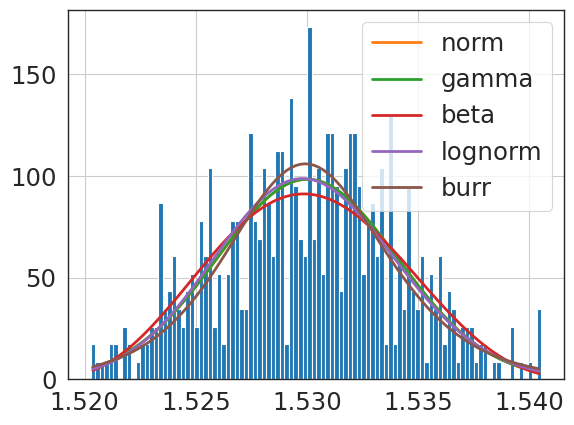

In [107]:
model_fit['dots-distance'].summary()
model_fit['dots-distance'].get_best(method = 'sumsquare_error')

{'beta': {'a': 67.52589566709678,
  'b': 0.6884309557579318,
  'loc': -1467.0378594616968,
  'scale': 1646.9894092767563}}

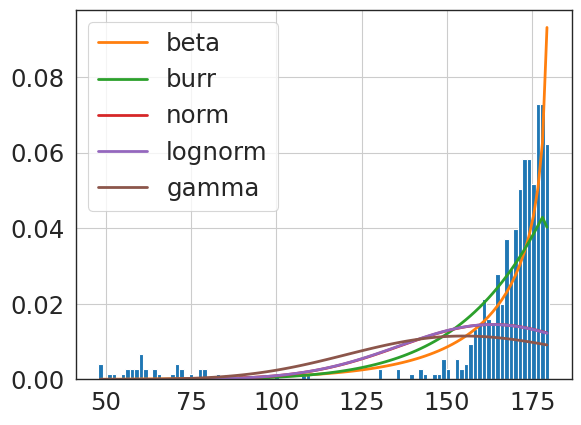

In [108]:
model_fit['planes-angle'].summary()
model_fit['planes-angle'].get_best(method = 'sumsquare_error')

{'burr': {'c': 2949.5574419108552,
  'd': 0.13422556951546782,
  'loc': -47.748711147041895,
  'scale': 51.684569426144}}

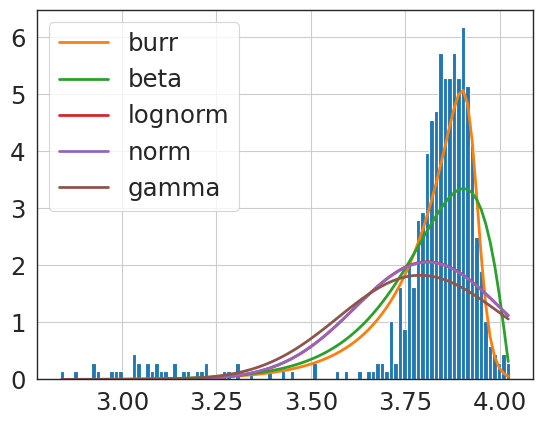

In [109]:
model_fit['dot_distance3'].summary()
model_fit['dot_distance3'].get_best(method = 'sumsquare_error')

In [110]:
np.random.beta(model_fit['dots-angle'].get_best(method = 'sumsquare_error')['beta']['a'],
               model_fit['dots-angle'].get_best(method = 'sumsquare_error')['beta']['b'])

1.3416697974642926e-05

In [111]:
sim_df['seq_id'] = [int(x.split('C')[1]) for x in sim_df['4']]
sim_df

IndexError: list index out of range

In [ ]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

dot_length  = (C, D)

dot_angle   = (B, C, D)

plane_angle = (A, B, C, D)


In [ ]:
#!pip3 install pyparsing==2.4.2
#!pip3 install httplib2

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak
import logging
logging.getLogger('tensorflow').disabled = True

In [ ]:
sim_df

In [ ]:
input_features = ['dots-angle','dots-distance', 'planes-angle', 'dot_distance3','seq_id']
output_variables = ['X','Y','Z']

In [ ]:
sim_df[sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)]

In [ ]:
sim_df[sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)][output_variables]['X']

In [ ]:
x_train = sim_df[sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)][input_features]
y_train = sim_df[sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)][output_variables]

#x_train = sim_df[np.array(sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)) & np.array(sim_df['seq_id'] <= 4)][input_features]
#y_train = sim_df[np.array(sim_df['COMPLIES'] <= int(len(np.unique(sim_df['COMPLIES']))*0.8)) & np.array(sim_df['seq_id'] <= 4)][output_variables]

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
# Preparing testing data.
x_test = sim_df[sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)][input_features]
y_test = sim_df[sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)][output_variables]

#x_test = sim_df[np.array(sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)) & np.array(sim_df['seq_id'] <= 4)][input_features]
#y_test = sim_df[np.array(sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)) & np.array(sim_df['seq_id'] <= 4)][output_variables]

In [ ]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=20, overwrite=True)
reg.fit(x_train, y_train, epochs=10)
# Predict with the best model.
predicted_y = reg.predict(x_test)
# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

In [ ]:
data_test = sim_df[sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)]
#data_test = sim_df[np.array(sim_df['COMPLIES'] > int(len(np.unique(sim_df['COMPLIES']))*0.8)) & np.array(sim_df['seq_id'] <= 4)]
data_test

In [ ]:
data_test[['X_sim','Y_sim','Z_sim']] = predicted_y
data_test

In [ ]:
data_test.head(20)

In [ ]:
mean = [1, 2]
cov = [[1, 0], [0, 1]]
np.random.multivariate_normal(mean, cov, 5)

In [ ]:
dataset

In [ ]:
dataset.mean()

In [ ]:
dataset.cov()

In [ ]:
np.random.multivariate_normal(dataset.mean(), dataset.cov(), 10)

In [ ]:
np.cov([dataset['dots-angle'],dataset['dots-angle']])

In [ ]:
dataset.corr()

In [ ]:
pd.DataFrame(np.random.multivariate_normal(dataset.mean(), dataset.cov(), 10),columns=dataset.columns)

In [ ]:
def multinorm_sim(ds, k):
    tmp_list = []
    while len(tmp_list) < k:
        tmp = np.random.multivariate_normal(ds.mean(), ds.cov(), 1)
        if (tmp > np.array(ds.min())).prod() and (tmp < np.array(ds.max())).prod():
            tmp_list.append(list(tmp[0]))

    return(np.array(tmp_list))

In [ ]:
def sim_seq2(seq_l = 20, k_double = 9):
    # seq_l = 20
    # k_double = 9
    sim_df = pd.DataFrame(columns = list(data_sim.columns)+['dot_distance3'])
    sim_df
    #seq_l = 20
    #k_double = 9
    sim_df['REMARK'] = range(1,seq_l+1)
    sim_df['4'] = ["C"+str(k) for k in range(1,seq_l+1)]
    sim_df['1DPP'] = ['OLA' for k in range(1,seq_l+1)]
    sim_df['COMPLIES'] = 1
    sim_df['2.0,'] = 1.0
    sim_df['18-NOV-1998'] = 0.0
    #sim_df['18-NOV-1998'] df[df['atom_seq2'] == 'CCCC']['dots-distance'].sample(n=seq_l)

    ds = df[df['atom_seq2']   == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    ds21 = df[df['atom_seq2'] == 'CCCc9'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    ds22 = df[df['atom_seq2'] == 'CCc9c10'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    ds23 = df[df['atom_seq2'] == 'Cc9c10C'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    ds24 = df[df['atom_seq2'] == 'c9c10CC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    ds25 = df[df['atom_seq2'] == 'c10CCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]
    
    tmp = pd.DataFrame(multinorm_sim(ds, seq_l),columns=ds.columns)
    #tmp = pd.DataFrame(np.random.multivariate_normal(ds.mean(), ds.cov(), seq_l),columns=ds.columns)
    #tmp = df[df['atom_seq2'] == 'CCCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=seq_l)
    tmp.index = sim_df.index
    sim_df[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']] = tmp[['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']]

    # tmp2 = pd.concat([df[df['atom_seq2'] == 'CCCc9'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
    #               df[df['atom_seq2'] == 'CCc9c10'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
    #               df[df['atom_seq2'] == 'Cc9c10C'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1),
    #               df[df['atom_seq2'] == 'c9c10CC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1), 
    #               df[df['atom_seq2'] == 'c10CCC'][['dots-angle', 'dots-distance', 'planes-angle','dot_distance3']].sample(n=1)])

#     tmp2 = pd.concat([pd.DataFrame(np.random.multivariate_normal(ds21.mean(), ds21.cov(), 1),columns=ds21.columns),
#                      pd.DataFrame(np.random.multivariate_normal(ds22.mean(), ds22.cov(), 1),columns=ds22.columns),
#                      pd.DataFrame(np.random.multivariate_normal(ds23.mean(), ds23.cov(), 1),columns=ds23.columns),
#                      pd.DataFrame(np.random.multivariate_normal(ds24.mean(), ds24.cov(), 1),columns=ds24.columns),
#                      pd.DataFrame(np.random.multivariate_normal(ds25.mean(), ds25.cov(), 1),columns=ds25.columns)])

    tmp2 = pd.concat([pd.DataFrame(multinorm_sim(ds21, 1),columns=ds21.columns),
                      pd.DataFrame(multinorm_sim(ds22, 1),columns=ds22.columns),
                      pd.DataFrame(multinorm_sim(ds23, 1),columns=ds23.columns),
                      pd.DataFrame(multinorm_sim(ds24, 1),columns=ds24.columns),
                      pd.DataFrame(multinorm_sim(ds25, 1),columns=ds25.columns),
                     ])

    tmp2.index = range(k_double-2, k_double+3)
    for k in range(k_double-2, k_double+3):
        for c in tmp2.columns:
            sim_df.at[k, c] = tmp2.at[k, c]

    #sim_df
    for k in range(3):
        if k == 0:
            sim_df.at[k, 'X'] = 0.0
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = 0.0
        if k == 1:
            sim_df.at[k, 'X'] = 0.0
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = sim_df.at[k, 'dots-distance']
        if k == 2:
            delta = 180-sim_df.at[k, 'dots-angle']
            sim_df.at[k, 'Y'] = 0.0
            sim_df.at[k, 'Z'] = np.cos(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'Z']
            sim_df.at[k, 'X'] = np.sin(np.radians(delta)) * sim_df.at[k, 'dots-distance'] + sim_df.at[k-1, 'X']
    #sim_df

    m = 0
    d = 0
    for k in range(m, len(sim_df)-3):
        xyz_sim = solve_d(sim_df, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = sim_df[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        #d_max = np.argmax(l)
        d_min = np.argmin([abs(sim_df['dot_distance3'].iloc[k+3] - x) for x in l])
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_min, d_random], p=[0.9999, 0.0001])
        sim_df.at[k+3, 'X'] = xyz_sim[d][0]
        sim_df.at[k+3, 'Y'] = xyz_sim[d][1]
        sim_df.at[k+3, 'Z'] = xyz_sim[d][2]

    return(sim_df)

In [ ]:
n_sim = 10
seq_l = 30
k_double = 9
sim_all = []
for k in range(n_sim):
    tmp_sim = sim_seq2(seq_l, k_double)
    tmp_sim['COMPLIES'] = k+1
    sim_all.append(tmp_sim)
    
sim_df2 = pd.concat(sim_all)
sim_df2

In [ ]:
sim_df2.index = ['ATOM' for k in range(len(sim_df2))]
sim_df2['REMARK'] = range(1,len(sim_df2)+1)

sim_df2['X'] = sim_df2['X'].astype(np.double)
sim_df2['Y'] = sim_df2['Y'].astype(np.double)
sim_df2['Z'] = sim_df2['Z'].astype(np.double)

sim_df2 = sim_df2.round(3)
sim_df2['COMPLIES'] = sim_df2['COMPLIES'].astype(np.int)
sim_df2['REMARK'] = sim_df2['REMARK'].astype(np.int)
sim_df2[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')

os.system('sh csv2pdb.sh')

In [ ]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

from IPython.display import IFrame

In [ ]:
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("PHA-L", "data_sim_all.pdb")
#structure = pdb_parser.get_structure("PHA-L", "data_obs1.pdb")
view = nv.show_biopython(structure)
#view.color_by('atomindex')
view

In [ ]:
view = view.color_by('atomindex')

In [ ]:
#view.render_image(trim=True, factor=2)
#view._display_image()

In [ ]:
df.to_csv('data_train.csv', index=False)
data_sim.to_csv('data_template.csv', index=False)

In [201]:
from IPython.display import Video

Video("movie.mp4")